In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [5]:
from ultralytics import YOLO
import yaml
import os

# Define the working directory where outputs (like runs, data.yaml) will be saved
# This path is typically on a temporary storage, like /kaggle/working in a Kaggle environment
WORK_DIR = "/kaggle/working/yolo_training_output"
os.makedirs(WORK_DIR, exist_ok=True)
print(f"Working directory created/ensured: {WORK_DIR}")

# Define the root directory of your dataset as per your new structure
# This is the parent directory containing 'images' and 'labels'
dataset_root = "/kaggle/input/detection-dataset-split/detection_dataset_split"
print(f"Dataset root set to: {dataset_root}")

# --- Create data.yaml for YOLOv8 ---
# This dictionary defines the structure and paths for your dataset for YOLO
data_yaml = {
    'path': dataset_root,  # The root directory of your dataset
    'train': 'images/train', # Path to training images relative to dataset_root
    'val': 'images/val',     # Path to validation images relative to dataset_root
    'nc': 11,                # Number of classes (as provided by you)
    'names': ['bike', 'car', 'cross', 'gate', 'person', 'pole', 'sign_off', 'sign_on', 'train', 'truck', 'wait_plate'] # Class names
}

# Define the path where the data.yaml file will be saved
yaml_path = os.path.join(WORK_DIR, 'data.yaml')

# Save the data.yaml dictionary to a YAML file
with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml, f, sort_keys=False)

print("\n✅ Generated data.yaml for YOLOv8 training:")
print(yaml.dump(data_yaml, sort_keys=False))
print(f"data.yaml saved to: {yaml_path}")

# --- Load and train YOLO model ---
# Load a pre-trained YOLOv8 nano model (yolov8n.pt)
print("\nLoading YOLOv8n model...")
model = YOLO("yolov8n.pt") # Ensure this file is accessible or downloaded

# Train the model using the defined data.yaml
print("Starting model training...")
model.train(
    data=yaml_path,        # Path to the data.yaml file
    epochs=50,             # Number of training epochs
    imgsz=640,             # Image size for training
    batch=16,              # Batch size
    name="crossing_gate_detector", # Name for the training run
    project=WORK_DIR       # Project directory where training results will be stored
)
print("Model training completed.")

# --- Evaluate the trained model ---
# Run validation on the trained model
print("\nStarting model evaluation...")
metrics = model.val()
print("Model evaluation completed.")

# Print key evaluation metrics
print("\n📊 Evaluation Metrics:")
print(f"mAP50: {metrics.box.map50:.3f}")    # Mean Average Precision at IoU 0.50
print(f"mAP50-95: {metrics.box.map:.3f}")   # Mean Average Precision across IoU 0.50-0.95
print(f"Precision: {metrics.box.mp():.3f}") # Mean Precision
print(f"Recall: {metrics.box.mr():.3f}")    # Mean Recall


Working directory created/ensured: /kaggle/working/yolo_training_output
Dataset root set to: /kaggle/input/detection-dataset-split/detection_dataset_split

✅ Generated data.yaml for YOLOv8 training:
path: /kaggle/input/detection-dataset-split/detection_dataset_split
train: images/train
val: images/val
nc: 11
names:
- bike
- car
- cross
- gate
- person
- pole
- sign_off
- sign_on
- train
- truck
- wait_plate

data.yaml saved to: /kaggle/working/yolo_training_output/data.yaml

Loading YOLOv8n model...


100%|██████████| 6.25M/6.25M [00:00<00:00, 82.0MB/s]


Starting model training...
Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/yolo_training_output/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=crossing_gate_detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pa

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 68.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.0 ms, read: 15.3±21.2 MB/s, size: 23.0 KB)


train: Scanning /kaggle/input/detection-dataset-split/detection_dataset_split/labels/train... 332 images, 0 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:01<00:00, 237.49it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/detection-dataset-split/detection_dataset_split/labels is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3.9±1.1 MB/s, size: 22.8 KB)


val: Scanning /kaggle/input/detection-dataset-split/detection_dataset_split/labels/val... 84 images, 0 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<00:00, 220.37it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/detection-dataset-split/detection_dataset_split/labels is not writeable, cache not saved.


Plotting labels to /kaggle/working/yolo_training_output/crossing_gate_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/yolo_training_output/crossing_gate_detector
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.27G      1.791      4.211      1.413        174        640: 100%|██████████| 21/21 [00:05<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         84        999     0.0126      0.289      0.102     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.45G      1.481      2.653      1.184        253        640: 100%|██████████| 21/21 [00:03<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]


                   all         84        999      0.941      0.107      0.267      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.47G      1.378      1.742      1.107        243        640: 100%|██████████| 21/21 [00:03<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]

                   all         84        999      0.949      0.115      0.351      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.48G      1.259      1.473      1.075        234        640: 100%|██████████| 21/21 [00:03<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]

                   all         84        999      0.884      0.329      0.468      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.5G      1.196      1.282      1.053        179        640: 100%|██████████| 21/21 [00:03<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         84        999       0.85      0.414      0.533      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.52G      1.133      1.145      1.021        221        640: 100%|██████████| 21/21 [00:03<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]

                   all         84        999      0.769       0.57      0.635      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.54G      1.093      1.081       1.01        253        640: 100%|██████████| 21/21 [00:03<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         84        999      0.759      0.601      0.663      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.55G      1.073      1.025      1.004        263        640: 100%|██████████| 21/21 [00:03<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]

                   all         84        999      0.758      0.695      0.718      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.57G      1.052     0.9634     0.9983        198        640: 100%|██████████| 21/21 [00:03<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]

                   all         84        999      0.878      0.679      0.771      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.59G      1.014     0.9215      0.983        215        640: 100%|██████████| 21/21 [00:03<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

                   all         84        999      0.886      0.743       0.78       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.6G      1.001     0.9068     0.9817        195        640: 100%|██████████| 21/21 [00:03<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]

                   all         84        999      0.777      0.858       0.82      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.62G     0.9801     0.8728     0.9717        203        640: 100%|██████████| 21/21 [00:03<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         84        999      0.882      0.764      0.825      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.64G      0.969     0.8645     0.9682        210        640: 100%|██████████| 21/21 [00:03<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

                   all         84        999       0.91      0.754      0.826      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.65G     0.9558     0.8334     0.9612        184        640: 100%|██████████| 21/21 [00:03<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.95it/s]

                   all         84        999      0.936      0.759      0.831      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.67G      0.934     0.8124     0.9539        205        640: 100%|██████████| 21/21 [00:03<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]

                   all         84        999       0.92      0.756      0.834      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.69G     0.9286     0.8153      0.954        174        640: 100%|██████████| 21/21 [00:03<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]

                   all         84        999      0.931      0.773       0.84      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.71G     0.8944     0.7805      0.939        219        640: 100%|██████████| 21/21 [00:03<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         84        999       0.93      0.765      0.833      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.72G     0.8655     0.7634      0.935        188        640: 100%|██████████| 21/21 [00:03<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.08it/s]

                   all         84        999      0.911      0.776      0.838      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.74G     0.8767     0.7621     0.9496        187        640: 100%|██████████| 21/21 [00:03<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]

                   all         84        999      0.792      0.809      0.828      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.76G     0.8614     0.7525     0.9385        171        640: 100%|██████████| 21/21 [00:03<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

                   all         84        999      0.944      0.786      0.853      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.77G     0.8625     0.7349     0.9251        196        640: 100%|██████████| 21/21 [00:03<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]

                   all         84        999      0.834      0.805      0.838      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.79G     0.8692     0.7271     0.9339        263        640: 100%|██████████| 21/21 [00:03<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.01it/s]

                   all         84        999      0.816      0.814      0.847      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.81G     0.8507      0.722     0.9297        172        640: 100%|██████████| 21/21 [00:03<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         84        999      0.899      0.815      0.852      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.82G     0.8528     0.7235     0.9361        196        640: 100%|██████████| 21/21 [00:03<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.27it/s]

                   all         84        999      0.807      0.851      0.866      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.84G     0.8325      0.703     0.9214        203        640: 100%|██████████| 21/21 [00:03<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]

                   all         84        999      0.946      0.799      0.868      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.86G     0.8184     0.6908     0.9207        204        640: 100%|██████████| 21/21 [00:03<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]

                   all         84        999      0.939      0.797      0.867      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.88G     0.8251     0.6917     0.9302        249        640: 100%|██████████| 21/21 [00:03<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

                   all         84        999       0.83      0.802      0.852      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.89G     0.8126     0.6853       0.92        191        640: 100%|██████████| 21/21 [00:03<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]

                   all         84        999      0.939      0.823      0.876      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.91G     0.8143     0.6901     0.9241        222        640: 100%|██████████| 21/21 [00:03<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]

                   all         84        999      0.846      0.816      0.875      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.93G     0.8124     0.6763     0.9168        185        640: 100%|██████████| 21/21 [00:03<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]

                   all         84        999      0.835      0.826       0.89      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.95G     0.7939     0.6687      0.909        219        640: 100%|██████████| 21/21 [00:03<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]

                   all         84        999      0.864      0.858      0.894       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.96G     0.7979     0.6803     0.9157        228        640: 100%|██████████| 21/21 [00:03<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]

                   all         84        999      0.847      0.856      0.883      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.98G     0.7956     0.6614      0.915        196        640: 100%|██████████| 21/21 [00:03<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

                   all         84        999      0.828      0.887      0.889      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         3G     0.7913     0.6442     0.9067        249        640: 100%|██████████| 21/21 [00:03<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]

                   all         84        999      0.957      0.833      0.885      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.01G     0.7517     0.6367     0.8983        203        640: 100%|██████████| 21/21 [00:03<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]

                   all         84        999      0.923      0.838      0.882      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.03G     0.7751     0.6425      0.907        202        640: 100%|██████████| 21/21 [00:03<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]

                   all         84        999      0.821      0.818      0.854      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.05G     0.7664     0.6406     0.9001        235        640: 100%|██████████| 21/21 [00:03<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]

                   all         84        999      0.862      0.807      0.861      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.06G     0.7535     0.6278     0.9017        161        640: 100%|██████████| 21/21 [00:03<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]

                   all         84        999      0.817      0.847       0.88      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.08G     0.7631     0.6386     0.9041        214        640: 100%|██████████| 21/21 [00:03<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]

                   all         84        999      0.929      0.852      0.899      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       3.1G      0.764     0.6287      0.906        160        640: 100%|██████████| 21/21 [00:03<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]

                   all         84        999      0.807      0.884      0.897      0.718


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.12G     0.7421     0.6323     0.8963        152        640: 100%|██████████| 21/21 [00:03<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]

                   all         84        999       0.82      0.897      0.892      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.13G     0.7267     0.6213     0.8986        127        640: 100%|██████████| 21/21 [00:03<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]

                   all         84        999      0.959       0.84      0.914      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.15G     0.7153     0.5903     0.8927        137        640: 100%|██████████| 21/21 [00:03<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]

                   all         84        999      0.852      0.881      0.904      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.17G      0.712     0.5953      0.896        123        640: 100%|██████████| 21/21 [00:03<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]

                   all         84        999      0.925      0.864      0.913      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.18G     0.6925     0.5846     0.8873        137        640: 100%|██████████| 21/21 [00:03<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]

                   all         84        999      0.874      0.894      0.912      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       3.2G     0.6829     0.5739     0.8871        135        640: 100%|██████████| 21/21 [00:03<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]

                   all         84        999      0.812      0.879      0.893       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.22G     0.6758     0.5718      0.876        147        640: 100%|██████████| 21/21 [00:03<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]

                   all         84        999      0.817      0.899      0.893       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.23G     0.6827     0.5685     0.8832        161        640: 100%|██████████| 21/21 [00:03<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.28it/s]

                   all         84        999      0.825       0.89      0.895      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.25G     0.6758     0.5693     0.8817        131        640: 100%|██████████| 21/21 [00:03<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]

                   all         84        999      0.821      0.889      0.886      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.27G      0.678     0.5617     0.8842        160        640: 100%|██████████| 21/21 [00:03<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

                   all         84        999      0.824      0.889      0.897      0.733



50 epochs completed in 0.059 hours.
Optimizer stripped from /kaggle/working/yolo_training_output/crossing_gate_detector/weights/last.pt, 6.3MB
Optimizer stripped from /kaggle/working/yolo_training_output/crossing_gate_detector/weights/best.pt, 6.3MB

Validating /kaggle/working/yolo_training_output/crossing_gate_detector/weights/best.pt...
Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         84        999      0.925      0.864      0.913      0.737
                  bike          7          7      0.848      0.857      0.822       0.44
                   car         33         43          1      0.998      0.995      0.914
                 cross         75        169      0.996      0.994      0.995      0.876
                  gate         84        205      0.966      0.932      0.976      0.763
                person          7         13          1      0.892      0.955      0.686
                  pole         75        164      0.805      0.909      0.899      0.523
              sign_off         81        211      0.914      0.954      0.981      0.837
               sign_on         69        166      0.926      0.973      0.983      0.854
                 train         10         10      0.936          1      0.995      0.947
                 truck          6          6       0.79          1      0.972        0.8
            wait_plat

val: Scanning /kaggle/input/detection-dataset-split/detection_dataset_split/labels/val... 84 images, 0 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<00:00, 1045.45it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/detection-dataset-split/detection_dataset_split/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         84        999      0.928      0.865      0.914      0.737
                  bike          7          7      0.848      0.857      0.822      0.438
                   car         33         43          1      0.998      0.995      0.921
                 cross         75        169      0.996      0.994      0.995       0.88
                  gate         84        205      0.965      0.932      0.976      0.763
                person          7         13          1      0.892      0.956      0.687
                  pole         75        164      0.825      0.915      0.904       0.53
              sign_off         81        211      0.918      0.954      0.982       0.84
               sign_on         69        166      0.926      0.973      0.983      0.852
                 train         10         10      0.936          1      0.995      0.947
                 truck          6          6       0.79          1      0.972      0.786
            wait_plat

TypeError: 'numpy.float64' object is not callable

In [6]:
import os

# Define the full path to the best.pt model file
# This matches the path indicated in your output
model_path = "/kaggle/working/yolo_training_output/crossing_gate_detector/weights/last.pt"

# Check if the file exists
if os.path.exists(model_path):
    # Get the file size in MB
    file_size_bytes = os.path.getsize(model_path)
    file_size_mb = file_size_bytes / (1024 * 1024)
    print(f"✅ Model found at: {model_path}")
    print(f"   File size: {file_size_mb:.2f} MB")

    # In a Kaggle notebook, you would typically use FileLink for direct download:
    # from IPython.display import FileLink
    # print(FileLink(model_path))

else:
    print(f"❌ Model not found at: {model_path}")
    print("Please ensure the training completed successfully and check the exact path.")



✅ Model found at: /kaggle/working/yolo_training_output/crossing_gate_detector/weights/last.pt
   File size: 5.96 MB


In [16]:
from IPython.display import FileLink
model_path = "/kaggle/working/yolo_training_output/crossing_gate_detector/weights/best.pt"
display(FileLink(model_path))

/kaggle/working/yolo_training_output/crossing_gate_detector/weights/best.pt

In [7]:
import os
import zipfile
from IPython.display import FileLink, display

# Define the full path to the best.pt model file
model_path = "/kaggle/working/yolo_training_output/crossing_gate_detector/weights/best.pt"

# Define the path for the new zip file in the /kaggle/working directory
zip_filename = "best_yolov8n_model1.zip"
zip_path = os.path.join("/kaggle/working", zip_filename)

# Check if the model file exists before zipping
if os.path.exists(model_path):
    print(f"Attempting to zip model from: {model_path}")
    print(f"Saving zip file to: {zip_path}")

    try:
        # Create a ZipFile object in write mode
        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            # Add the model file to the zip archive.
            # arcname is important here to ensure the file is named simply 'best.pt'
            # inside the zip, rather than including the full path.
            zipf.write(model_path, arcname=os.path.basename(model_path))
        print(f"✅ Model successfully zipped to: {zip_path}")

        # Now, try to provide a download link for the zip file
        print("\nAttempting to generate a direct download link for the zip file:")
        display(FileLink(zip_path))
        print("If the above link doesn't work (404 error), please proceed to the next steps.")

    except Exception as e:
        print(f"❌ Error during zipping: {e}")
else:
    print(f"❌ Model file not found at: {model_path}. Cannot create zip archive.")
    print("Please ensure your training run completed successfully and the file exists at this path.")



Attempting to zip model from: /kaggle/working/yolo_training_output/crossing_gate_detector/weights/best.pt
Saving zip file to: /kaggle/working/best_yolov8n_model1.zip
✅ Model successfully zipped to: /kaggle/working/best_yolov8n_model1.zip

Attempting to generate a direct download link for the zip file:


/kaggle/working/best_yolov8n_model1.zip

If the above link doesn't work (404 error), please proceed to the next steps.


✅ Model successfully loaded from: /kaggle/input/yolo_detection/other/default/1/best.pt

🖼️ Selected Random Images:
 - /kaggle/input/detection-dataset-split/detection_dataset_split/images/train/frame400_jpg.rf.71b94492b07b50983e8a024e1a5ebd7c.jpg
 - /kaggle/input/detection-dataset-split/detection_dataset_split/images/train/frame1300_jpg.rf.26389e9e4ebc9e890de7fcad5ffec9f0.jpg
 - /kaggle/input/detection-dataset-split/detection_dataset_split/images/train/frame950_jpg.rf.7ed954712e8cdb78684c43fe7cc3aed1.jpg
 - /kaggle/input/detection-dataset-split/detection_dataset_split/images/train/frame1150_jpg.rf.1cdef03a6f4e2ba841ef839d45eda5de.jpg
 - /kaggle/input/detection-dataset-split/detection_dataset_split/images/train/frame0_jpg.rf.a19e8054963a02a371bf829effa015b8.jpg

0: 640x640 2 crosss, 2 gates, 2 poles, 2 sign_offs, 2 sign_ons, 5.3ms
1: 640x640 1 car, 2 crosss, 3 gates, 1 pole, 4 sign_offs, 5.3ms
2: 640x640 2 crosss, 2 gates, 1 pole, 2 sign_offs, 2 sign_ons, 1 train, 5.3ms
3: 640x640 1 bike

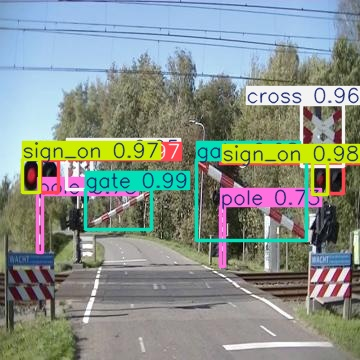


--- Results for Image 2: frame1300_jpg.rf.26389e9e4ebc9e890de7fcad5ffec9f0.jpg ---
Detected 11 object(s):
  Class: car (ID: 1)
  Confidence: 0.99
  Bounding Box (xyxy): [0.10, 196.58, 142.57, 359.81]
--------------------
  Class: cross (ID: 2)
  Confidence: 0.98
  Bounding Box (xyxy): [275.66, 53.69, 341.42, 111.02]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.98
  Bounding Box (xyxy): [11.82, 154.80, 25.36, 180.06]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.98
  Bounding Box (xyxy): [282.94, 119.45, 308.42, 162.62]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.95
  Bounding Box (xyxy): [309.95, 116.65, 334.80, 162.74]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.95
  Bounding Box (xyxy): [24.90, 154.84, 38.04, 178.87]
--------------------
  Class: cross (ID: 2)
  Confidence: 0.91
  Bounding Box (xyxy): [105.75, 159.83, 125.27, 177.07]
--------------------
  Class: gate (ID: 3)
  Confidence: 0.86
  Bounding Box (

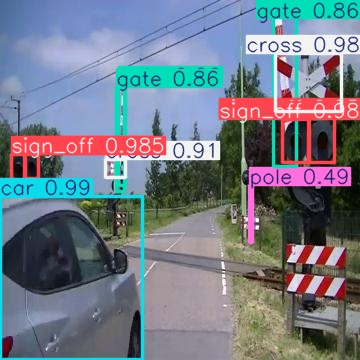


--- Results for Image 3: frame950_jpg.rf.7ed954712e8cdb78684c43fe7cc3aed1.jpg ---
Detected 10 object(s):
  Class: train (ID: 8)
  Confidence: 0.98
  Bounding Box (xyxy): [0.00, 154.61, 322.11, 286.87]
--------------------
  Class: cross (ID: 2)
  Confidence: 0.94
  Bounding Box (xyxy): [315.89, 161.43, 348.27, 206.14]
--------------------
  Class: sign_on (ID: 7)
  Confidence: 0.94
  Bounding Box (xyxy): [94.58, 192.59, 108.63, 219.56]
--------------------
  Class: sign_on (ID: 7)
  Confidence: 0.92
  Bounding Box (xyxy): [323.26, 204.90, 334.34, 227.93]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.92
  Bounding Box (xyxy): [81.08, 193.13, 94.57, 217.81]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.91
  Bounding Box (xyxy): [334.29, 204.80, 346.00, 228.98]
--------------------
  Class: cross (ID: 2)
  Confidence: 0.90
  Bounding Box (xyxy): [14.07, 155.05, 49.49, 202.46]
--------------------
  Class: gate (ID: 3)
  Confidence: 0.87
  Bounding Box (x

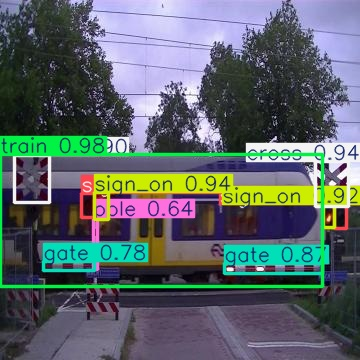


--- Results for Image 4: frame1150_jpg.rf.1cdef03a6f4e2ba841ef839d45eda5de.jpg ---
Detected 14 object(s):
  Class: car (ID: 1)
  Confidence: 1.00
  Bounding Box (xyxy): [125.54, 232.83, 271.89, 360.00]
--------------------
  Class: car (ID: 1)
  Confidence: 0.98
  Bounding Box (xyxy): [227.93, 226.86, 346.26, 359.71]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.98
  Bounding Box (xyxy): [40.23, 160.63, 58.58, 192.59]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.98
  Bounding Box (xyxy): [22.61, 158.63, 39.91, 191.58]
--------------------
  Class: cross (ID: 2)
  Confidence: 0.97
  Bounding Box (xyxy): [301.59, 105.50, 343.82, 168.09]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.95
  Bounding Box (xyxy): [328.27, 163.87, 343.14, 193.44]
--------------------
  Class: cross (ID: 2)
  Confidence: 0.93
  Bounding Box (xyxy): [66.66, 156.82, 92.42, 189.48]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.93
  Bounding Box (

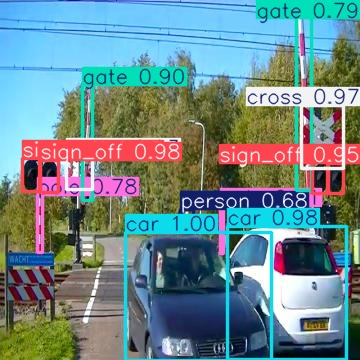


--- Results for Image 5: frame0_jpg.rf.a19e8054963a02a371bf829effa015b8.jpg ---
Detected 24 object(s):
  Class: cross (ID: 2)
  Confidence: 0.96
  Bounding Box (xyxy): [197.09, 182.06, 218.81, 211.01]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.96
  Bounding Box (xyxy): [249.54, 104.36, 262.29, 127.59]
--------------------
  Class: cross (ID: 2)
  Confidence: 0.95
  Bounding Box (xyxy): [20.49, 162.15, 53.91, 205.33]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.91
  Bounding Box (xyxy): [241.16, 104.78, 251.44, 126.70]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.89
  Bounding Box (xyxy): [22.30, 202.63, 33.80, 224.69]
--------------------
  Class: cross (ID: 2)
  Confidence: 0.86
  Bounding Box (xyxy): [287.11, 199.73, 301.33, 220.64]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.82
  Bounding Box (xyxy): [33.92, 202.45, 45.88, 224.88]
--------------------
  Class: gate (ID: 3)
  Confidence: 0.79
  Bounding Box (

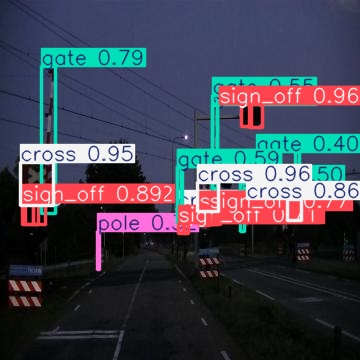

In [8]:
from ultralytics import YOLO
import os
import random
from IPython.display import Image, display

# --- 1. Define model path and load the trained model ---
model_path = "/kaggle/input/yolo_detection/other/default/1/best.pt"

try:
    model = YOLO(model_path)
    print(f"✅ Model successfully loaded from: {model_path}")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    exit()

# --- 2. Pick 5 random images from a directory ---
image_dir = "/kaggle/input/detection-dataset-split/detection_dataset_split/images/train"
all_images = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Check for at least 5 images
if len(all_images) < 5:
    raise ValueError("❌ Not enough images in the folder to sample 5.")

random_images = random.sample(all_images, 5)
print("\n🖼️ Selected Random Images:")
for img in random_images:
    print(f" - {img}")

# --- 3. Run inference ---
results = model.predict(
    source=random_images,
    save=True,
    save_txt=True,
    save_conf=True,
    name="random_5_predictions"
)

print("\n✅ Inference completed.")

# --- 4. Process and display results ---
for i, result in enumerate(results):
    image_path = random_images[i]
    print(f"\n--- Results for Image {i+1}: {os.path.basename(image_path)} ---")

    if result.boxes:
        print(f"Detected {len(result.boxes)} object(s):")
        for box in result.boxes:
            xyxy = box.xyxy[0].tolist()
            conf = box.conf[0].item()
            cls = int(box.cls[0].item())
            class_name = model.names[cls]
            print(f"  Class: {class_name} (ID: {cls})")
            print(f"  Confidence: {conf:.2f}")
            print(f"  Bounding Box (xyxy): [{xyxy[0]:.2f}, {xyxy[1]:.2f}, {xyxy[2]:.2f}, {xyxy[3]:.2f}]")
            print("-" * 20)
    else:
        print("No objects detected.")

    # Display the annotated image
    output_dir = result.save_dir
    predicted_image_path = os.path.join(output_dir, os.path.basename(image_path))
    print(f"📸 Showing annotated image: {predicted_image_path}")
    display(Image(filename=predicted_image_path))


In [ ]:
# Dynamic ROI

✅ Model successfully loaded from: /kaggle/input/yolo_detection/other/default/1/best.pt

🖼️ Testing inference on single image: /kaggle/input/detection-dataset-split/detection_dataset_split/images/train/frame500_jpg.rf.b114d1367f58c741b7ff77ead6583bea.jpg

0: 640x640 2 crosss, 2 gates, 2 sign_offs, 2 sign_ons, 8.9ms
Speed: 2.5ms preprocess, 8.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/single_image_test_prediction
1 label saved to runs/detect/single_image_test_prediction/labels

✅ Inference completed.

--- Results for Image 1: frame500_jpg.rf.b114d1367f58c741b7ff77ead6583bea.jpg ---
Detected 8 object(s):
  Class: cross (ID: 2)
  Confidence: 0.99
  Bounding Box (xyxy): [31.95, 23.99, 106.94, 122.43]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.96
  Bounding Box (xyxy): [71.96, 118.90, 97.87, 163.86]
--------------------
  Class: sign_on (ID: 7)
  Confidence: 0.96
  Bounding Box (xyxy): [45.41, 115.67, 69.40, 164.20]
-

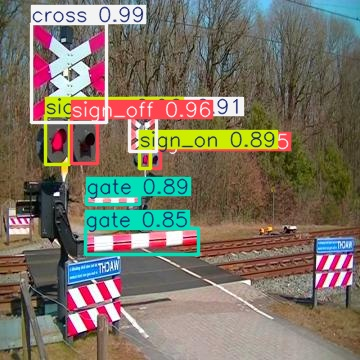

In [11]:
from ultralytics import YOLO
import os
from IPython.display import Image, display

# --- 1. Define model path and load the trained model ---
# Ensure this path correctly points to your trained YOLOv8 detection model.
model_path = "/kaggle/input/yolo_detection/other/default/1/best.pt"

try:
    model = YOLO(model_path)
    print(f"✅ Model successfully loaded from: {model_path}")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("Please ensure the model file exists at the specified path and is not corrupted.")
    exit() # Exit if the model cannot be loaded

# --- 2. Define the path to the single image you want to test ---
test_image_path = "/kaggle/input/detection-dataset-split/detection_dataset_split/images/train/frame500_jpg.rf.b114d1367f58c741b7ff77ead6583bea.jpg"

# Ensure the specified test image exists
if not os.path.exists(test_image_path):
    print(f"❌ Error: Test image not found at: {test_image_path}")
    print("Please verify the image path.")
    exit()

print(f"\n🖼️ Testing inference on single image: {test_image_path}")

# --- 3. Run inference on the single test image ---
# The 'predict' method will perform object detection.
# It automatically saves annotated images and detection details.
results = model.predict(
    source=[test_image_path], # Wrap the single image path in a list
    save=True,                # Save annotated images
    save_txt=True,            # Save detection coordinates in .txt files
    save_conf=True,           # Save confidence scores in .txt files
    name="single_image_test_prediction" # Custom name for the prediction run folder
)

print("\n✅ Inference completed.")

# --- 4. Process and display results for the single image ---
# Since 'results' is a list (even for a single image), iterate over it.
# In this case, the loop will run only once.
for i, result in enumerate(results):
    # The image path is directly the 'test_image_path' we defined
    current_image_path = test_image_path
    print(f"\n--- Results for Image {i+1}: {os.path.basename(current_image_path)} ---")

    # Check if any objects were detected in the image
    if result.boxes:
        print(f"Detected {len(result.boxes)} object(s):")
        for box in result.boxes:
            # Get bounding box coordinates in xyxy format (top-left x, y; bottom-right x, y)
            xyxy = box.xyxy[0].tolist()
            # Get confidence score
            conf = box.conf[0].item()
            # Get class ID
            cls = int(box.cls[0].item())
            # Get class name from the model's names attribute
            class_name = model.names[cls]

            print(f"  Class: {class_name} (ID: {cls})")
            print(f"  Confidence: {conf:.2f}")
            print(f"  Bounding Box (xyxy): [{xyxy[0]:.2f}, {xyxy[1]:.2f}, {xyxy[2]:.2f}, {xyxy[3]:.2f}]")
            print("-" * 20)
    else:
        print("No objects detected in this image.")

    # --- Display the annotated image ---
    # The 'save_dir' attribute of the result object gives the path where the annotated image is saved.
    if hasattr(result, 'save_dir'):
        output_dir = result.save_dir
        # The saved image will have the same filename as the input image
        predicted_image_path = os.path.join(output_dir, os.path.basename(current_image_path))

        if os.path.exists(predicted_image_path):
            print(f"\n📸 Displaying annotated image from: {predicted_image_path}")
            display(Image(filename=predicted_image_path))
        else:
            print(f"❌ Annotated output image not found at: {predicted_image_path}")
            print("Please check the 'runs/detect/single_image_test_prediction' directory in your Kaggle 'Output' tab.")
    else:
        print("\nCould not determine output image save directory.")




image 1/1 /kaggle/input/detection-dataset-split/detection_dataset_split/images/train/frame500_jpg.rf.b114d1367f58c741b7ff77ead6583bea.jpg: 640x640 2 crosss, 2 gates, 2 sign_offs, 2 sign_ons, 9.2ms
Speed: 2.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


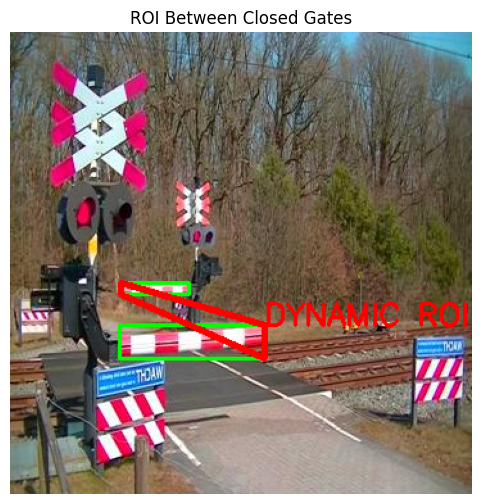

In [14]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# === Load the YOLOv8 model ===
model_path = "/kaggle/input/yolo_detection/other/default/1/best.pt"
model = YOLO(model_path)

# === Run inference on your input image ===
image_path = "/kaggle/input/detection-dataset-split/detection_dataset_split/images/train/frame500_jpg.rf.b114d1367f58c741b7ff77ead6583bea.jpg"
results = model(image_path)

# Load original image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# === Extract gate bounding boxes ===
gate_boxes = []
for box in results[0].boxes:
    class_id = int(box.cls[0])
    class_name = model.names[class_id]
    
    if class_name == "gate":
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        gate_boxes.append(((x1, y1), (x2, y2)))  # top-left and bottom-right

# === Continue only if exactly 2 gates are detected ===
if len(gate_boxes) == 2:
    # Sort by x position (left-to-right)
    gate_boxes = sorted(gate_boxes, key=lambda b: b[0][0])

    # Define the vertical ROI region between the gates
    (x1a, y1a), (x2a, y2a) = gate_boxes[0]  # Left gate
    (x1b, y1b), (x2b, y2b) = gate_boxes[1]  # Right gate

    # Compute ROI polygon: top-left, top-right, bottom-right, bottom-left
    roi_pts = np.array([
        [x2a, y1a],  # top-right of left gate
        [x1b, y1b],  # top-left of right gate
        [x1b, y2b],  # bottom-left of right gate
        [x2a, y2a]   # bottom-right of left gate
    ], dtype=np.int32)

    # Draw gate boxes
    for (pt1, pt2) in gate_boxes:
        cv2.rectangle(img_rgb, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), (0, 255, 0), 2)

    # Draw ROI polygon
    cv2.polylines(img_rgb, [roi_pts], isClosed=True, color=(255, 0, 0), thickness=3)
    cv2.putText(img_rgb, "DYNAMIC ROI", tuple(roi_pts[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Optionally: fill ROI
    # cv2.fillPoly(img_rgb, [roi_pts], color=(0, 0, 255, 50))

else:
    print(f"❌ Expected 2 gates, but found {len(gate_boxes)}. Cannot create ROI.")

# === Display the output ===
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("ROI Between Closed Gates")
plt.show()



image 1/1 /kaggle/input/obstical/obstical.png: 512x640 2 cars, 2 crosss, 2 gates, 2 sign_offs, 8.8ms
Speed: 2.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


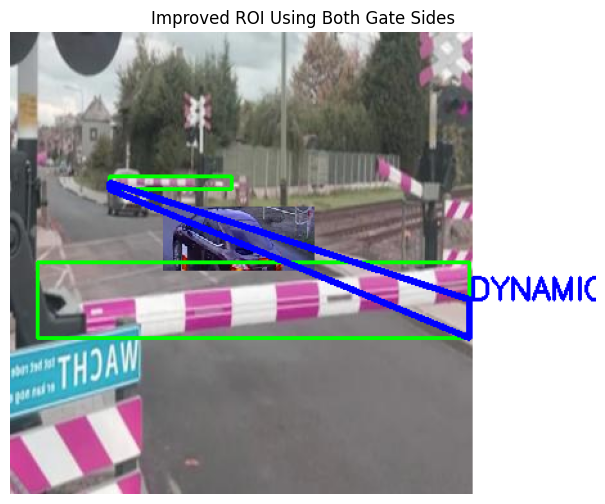

In [17]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model_path = "/kaggle/input/yolo_detection/other/default/1/best.pt"
model = YOLO(model_path)

# Image to test
image_path = "/kaggle/input/obstical/obstical.png"
results = model(image_path)

# Load image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Extract "gate" bounding boxes
gate_boxes = []
for box in results[0].boxes:
    class_id = int(box.cls[0])
    class_name = model.names[class_id]
    
    if class_name == "gate":
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        gate_boxes.append(((x1, y1), (x2, y2)))  # (top-left, bottom-right)

# Proceed only if exactly two gates are detected
if len(gate_boxes) == 2:
    # Sort left and right gate by x position
    gate_boxes = sorted(gate_boxes, key=lambda b: b[0][0])

    # Left gate (closer to camera)
    (lx1, ly1), (lx2, ly2) = gate_boxes[0]
    # Right gate (further from camera)
    (rx1, ry1), (rx2, ry2) = gate_boxes[1]

    # Create a cleaner quadrilateral between both gates (use both left and right edges)
    roi_pts = np.array([
        [int(lx2), int((ly1 + ly2) / 2)],  # right side of left gate, center
        [int(rx1), int((ry1 + ry2) / 2)],  # left side of right gate, center
        [int(rx1), int(ry2)],              # left side bottom of right gate
        [int(lx2), int(ly2)]               # right side bottom of left gate
    ], dtype=np.int32)

    # Optional: Draw gate boxes
    for (pt1, pt2) in gate_boxes:
        cv2.rectangle(img_rgb, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), (0, 255, 0), 2)

    # Draw the new ROI polygon
    cv2.polylines(img_rgb, [roi_pts], isClosed=True, color=(0, 0, 255), thickness=3)
    cv2.putText(img_rgb, "DYNAMIC ROI", tuple(roi_pts[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

else:
    print(f"❌ Expected 2 gates, but found {len(gate_boxes)}. Cannot create ROI.")

# Show result
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Improved ROI Using Both Gate Sides")
plt.show()



image 1/1 /kaggle/input/obstical/obstical.png: 512x640 2 cars, 2 crosss, 2 gates, 2 sign_offs, 8.1ms
Speed: 2.2ms preprocess, 8.1ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)


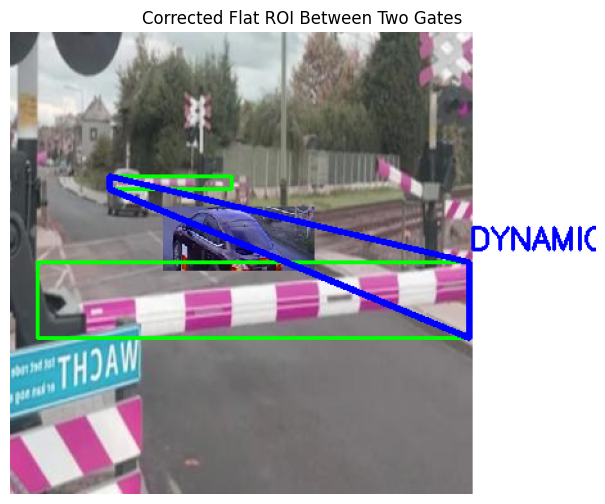

In [19]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the model
model_path = "/kaggle/input/yolo_detection/other/default/1/best.pt"
model = YOLO(model_path)

# Load the image
image_path = "/kaggle/input/obstical/obstical.png"
results = model(image_path)

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect gate bounding boxes
gate_boxes = []
for box in results[0].boxes:
    class_id = int(box.cls[0])
    if model.names[class_id] == "gate":
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        gate_boxes.append(((x1, y1), (x2, y2)))  # (top-left, bottom-right)

# Proceed if 2 gates are found
if len(gate_boxes) == 2:
    # Sort gates left to right
    gate_boxes = sorted(gate_boxes, key=lambda b: b[0][0])
    
    # Unpack coordinates
    (lx1, ly1), (lx2, ly2) = gate_boxes[0]  # Left gate
    (rx1, ry1), (rx2, ry2) = gate_boxes[1]  # Right gate

    # Define clean rectangular ROI corners
    roi_pts = np.array([
        [int(lx2), int(ly1)],   # top-right of left gate
        [int(rx1), int(ry1)],   # top-left of right gate
        [int(rx1), int(ry2)],   # bottom-left of right gate
        [int(lx2), int(ly2)]    # bottom-right of left gate
    ], dtype=np.int32)

    # Optional: Draw gate boxes
    for (pt1, pt2) in gate_boxes:
        cv2.rectangle(img_rgb, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), (0, 255, 0), 2)

    # Draw the rectangular ROI
    cv2.polylines(img_rgb, [roi_pts], isClosed=True, color=(0, 0, 255), thickness=3)
    cv2.putText(img_rgb, "DYNAMIC ROI", (roi_pts[0][0], roi_pts[0][1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

else:
    print(f"❌ Expected 2 gates, but found {len(gate_boxes)}")

# Show result
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Corrected Flat ROI Between Two Gates")
plt.show()



image 1/1 /kaggle/input/obstical/obstical.png: 512x640 2 cars, 2 crosss, 2 gates, 2 sign_offs, 8.1ms
Speed: 2.2ms preprocess, 8.1ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 640)


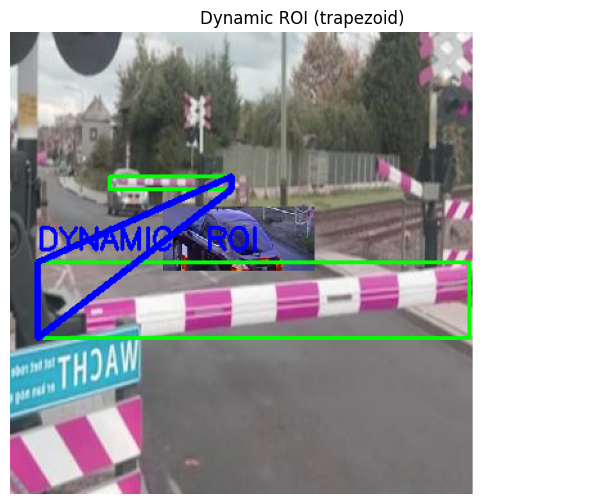

In [20]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load model
model_path = "/kaggle/input/yolo_detection/other/default/1/best.pt"
model = YOLO(model_path)

# Image path
image_path = "/kaggle/input/obstical/obstical.png"
results = model(image_path)

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect gate bounding boxes
gate_boxes = []
for box in results[0].boxes:
    class_id = int(box.cls[0])
    if model.names[class_id] == "gate":
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        gate_boxes.append(((x1, y1), (x2, y2)))

# Proceed only if exactly 2 gates are found
if len(gate_boxes) == 2:
    # Sort left to right
    gate_boxes = sorted(gate_boxes, key=lambda b: b[0][0])
    (lx1, ly1), (lx2, ly2) = gate_boxes[0]  # Left gate
    (rx1, ry1), (rx2, ry2) = gate_boxes[1]  # Right gate

    # Define trapezoid ROI as in your manual image
    roi_pts = np.array([
        [lx1, ly1],  # top-left of left gate
        [rx2, ry1],  # top-right of right gate
        [rx2, ry2],  # bottom-right of right gate
        [lx1, ly2],  # bottom-left of left gate
    ], dtype=np.int32)

    # Optional: draw bounding boxes
    for pt1, pt2 in gate_boxes:
        cv2.rectangle(img_rgb, pt1, pt2, (0, 255, 0), 2)

    # Draw the trapezoid ROI
    cv2.polylines(img_rgb, [roi_pts], isClosed=True, color=(0, 0, 255), thickness=3)
    cv2.putText(img_rgb, "DYNAMIC  ROI", (lx1, ly1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

else:
    print(f"❌ Detected {len(gate_boxes)} gates. Expected exactly 2.")

# Display result
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Dynamic ROI (trapezoid)")
plt.show()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /kaggle/input/obstical/obstical.png: 512x640 2 cars, 2 crosss, 2 gates, 2 sign_offs, 34.4ms
Speed: 10.8ms preprocess, 34.4ms inference, 292.9ms postprocess per image at shape (1, 3, 512, 640)
ROI Coordinates (rectangle):
  Point 1: (77, 112)
  Point 2: (172, 122)
  Point 3: (357, 238)
  Point 4: (21, 179)

Detected Objects:
--------------------
  Class: car (ID: 1)
  Confidence: 0.97
  Bounding Box (xyxy): [126.48, 135.43, 212.64, 186.84]
--------------------
  Class: cross (ID: 2)
  Confidence: 0.96
  Bounding Box (xyxy): [318.40, 0.41, 359.88, 44.34]
--------------------
  Class: car (ID: 1)
  Confidence: 0.92
  Bounding Box (xyxy): [74.35, 107.91, 108.50, 142.71]
---

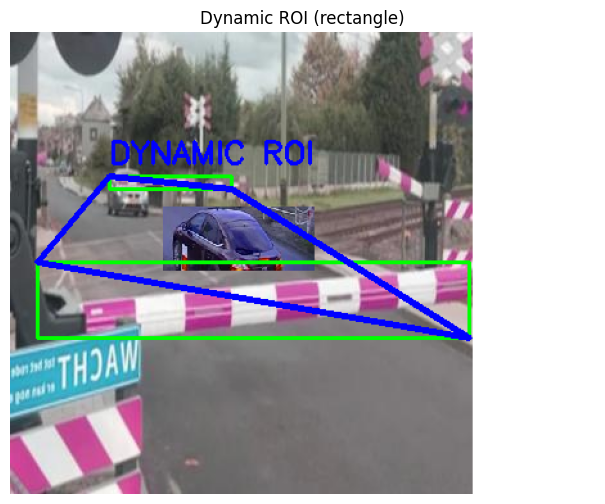

In [4]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load model
model_path = "/kaggle/input/yolo_detection/other/default/1/best.pt"
model = YOLO(model_path)

# Image path
image_path = "/kaggle/input/obstical/obstical.png"
results = model(image_path)

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect gate bounding boxes
gate_boxes = []
for box in results[0].boxes:
    class_id = int(box.cls[0])
    if model.names[class_id] == "gate":
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        gate_boxes.append(((x1, y1), (x2, y2)))

# Proceed only if exactly 2 gates are found
if len(gate_boxes) == 2:
    # Sort by y (top to bottom) if needed, or by x (left to right)
    gate_boxes = sorted(gate_boxes, key=lambda b: (b[0][1], b[0][0]))
    (tl_x, tl_y), (tr_x, tr_y) = gate_boxes[0]  # Top gate: left and right
    (bl_x, bl_y), (br_x, br_y) = gate_boxes[1]  # Bottom gate: left and right

    # Rectangle ROI: top-left, top-right, bottom-right, bottom-left
    roi_pts = np.array([
        [tl_x, tl_y],  # top-left
        [tr_x, tr_y],  # top-right
        [br_x, br_y],  # bottom-right
        [bl_x, bl_y],  # bottom-left
    ], dtype=np.int32)

    # Draw gate bounding boxes
    for pt1, pt2 in gate_boxes:
        cv2.rectangle(img_rgb, pt1, pt2, (0, 255, 0), 2)

    # Draw the ROI rectangle
    cv2.polylines(img_rgb, [roi_pts], isClosed=True, color=(0, 0, 255), thickness=3)
    cv2.putText(img_rgb, "DYNAMIC ROI", (tl_x, tl_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    # Print ROI coordinates
    print("ROI Coordinates (rectangle):")
    for i, (x, y) in enumerate(roi_pts):
        print(f"  Point {i+1}: ({x}, {y})")

else:
    print(f"❌ Detected {len(gate_boxes)} gates. Expected exactly 2.")

# Print all detected objects
print("\nDetected Objects:")
for box in results[0].boxes:
    class_id = int(box.cls[0])
    class_name = model.names[class_id]
    conf = float(box.conf[0])
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    print("--------------------")
    print(f"  Class: {class_name} (ID: {class_id})")
    print(f"  Confidence: {conf:.2f}")
    print(f"  Bounding Box (xyxy): [{x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f}]")

# Display result
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Dynamic ROI (rectangle)")
plt.show()

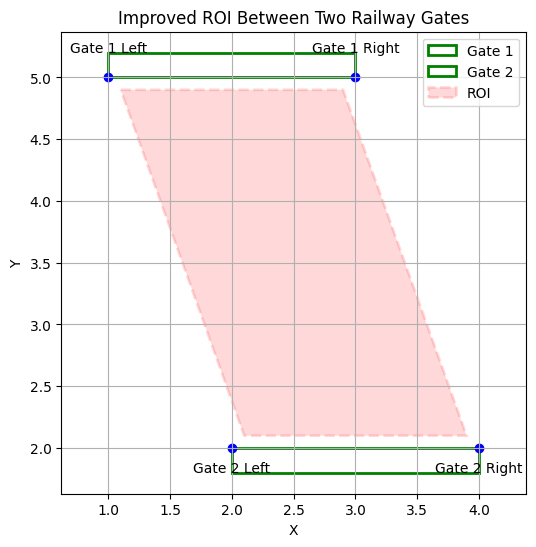

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Example gate coordinates (customize as needed)
x1_left, x1_right = 1, 3
y1_top = 5
x2_left, x2_right = 2, 4
y2_bottom = 2

fig, ax = plt.subplots(figsize=(6, 6))

# Draw gate bounding boxes first (solid green)
ax.add_patch(
    patches.Rectangle(
        (x1_left, y1_top), x1_right - x1_left, 0.2,
        linewidth=2, edgecolor='green', facecolor='none', label='Gate 1'
    )
)
ax.add_patch(
    patches.Rectangle(
        (x2_left, y2_bottom - 0.2), x2_right - x2_left, 0.2,
        linewidth=2, edgecolor='green', facecolor='none', label='Gate 2'
    )
)

# Draw ROI as a polygon with dashed red line and transparent fill
roi_coords = [
    (x1_left + 0.1, y1_top - 0.1),      # slightly inside top-left
    (x1_right - 0.1, y1_top - 0.1),     # slightly inside top-right
    (x2_right - 0.1, y2_bottom + 0.1),  # slightly inside bottom-right
    (x2_left + 0.1, y2_bottom + 0.1)    # slightly inside bottom-left
]
roi_polygon = patches.Polygon(
    roi_coords, closed=True, edgecolor='red', linestyle='--',
    linewidth=2, facecolor='red', alpha=0.15, label='ROI'
)
ax.add_patch(roi_polygon)

# Draw gate corner points and labels
ax.scatter(
    [x1_left, x1_right, x2_left, x2_right],
    [y1_top, y1_top, y2_bottom, y2_bottom],
    color='blue'
)
ax.text(x1_left, y1_top + 0.2, 'Gate 1 Left', ha='center')
ax.text(x1_right, y1_top + 0.2, 'Gate 1 Right', ha='center')
ax.text(x2_left, y2_bottom - 0.2, 'Gate 2 Left', ha='center')
ax.text(x2_right, y2_bottom - 0.2, 'Gate 2 Right', ha='center')

ax.set_title('Improved ROI Between Two Railway Gates')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)
ax.axis('equal')
ax.legend()
plt.show()

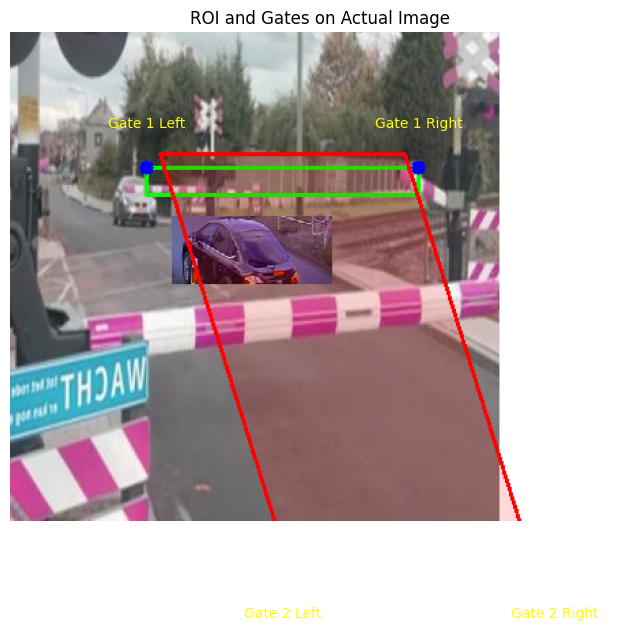

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/kaggle/input/obstical/obstical.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Example coordinates (replace with your actual values)
x1_left, x1_right = 100, 300
y1_top = 100
x2_left, x2_right = 200, 400
y2_bottom = 400

# Draw gate rectangles (green)
cv2.rectangle(img_rgb, (x1_left, y1_top), (x1_right, y1_top+20), (0,255,0), 2)
cv2.rectangle(img_rgb, (x2_left, y2_bottom-20), (x2_right, y2_bottom), (0,255,0), 2)

# ROI polygon (red, dashed not supported in cv2, so solid)
roi_coords = np.array([
    [x1_left+10, y1_top-10],
    [x1_right-10, y1_top-10],
    [x2_right-10, y2_bottom+10],
    [x2_left+10, y2_bottom+10]
], np.int32)
cv2.polylines(img_rgb, [roi_coords], isClosed=True, color=(255,0,0), thickness=2)
overlay = img_rgb.copy()
cv2.fillPoly(overlay, [roi_coords], color=(255,0,0))
alpha = 0.15
img_rgb = cv2.addWeighted(overlay, alpha, img_rgb, 1 - alpha, 0)

# Draw gate corner points (blue)
for (x, y) in [(x1_left, y1_top), (x1_right, y1_top), (x2_left, y2_bottom), (x2_right, y2_bottom)]:
    cv2.circle(img_rgb, (x, y), 5, (0,0,255), -1)

# Add labels using Matplotlib for better font rendering
plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.text(x1_left, y1_top-30, 'Gate 1 Left', color='yellow', ha='center')
plt.text(x1_right, y1_top-30, 'Gate 1 Right', color='yellow', ha='center')
plt.text(x2_left, y2_bottom+30, 'Gate 2 Left', color='yellow', ha='center')
plt.text(x2_right, y2_bottom+30, 'Gate 2 Right', color='yellow', ha='center')
plt.title('ROI and Gates on Actual Image')
plt.axis('off')
plt.show()


image 1/1 /kaggle/input/obstical/obstical.png: 512x640 2 cars, 2 crosss, 2 gates, 2 sign_offs, 8.3ms
Speed: 3.3ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)
ROI Coordinates (polygon):
  Point 1: (77, 122)
  Point 2: (172, 122)
  Point 3: (357, 179)
  Point 4: (21, 179)

Detected Objects:
--------------------
  Class: car (ID: 1)
  Confidence: 0.97
  Bounding Box (xyxy): [126.48, 135.43, 212.64, 186.84]
--------------------
  Class: cross (ID: 2)
  Confidence: 0.96
  Bounding Box (xyxy): [318.40, 0.41, 359.88, 44.34]
--------------------
  Class: car (ID: 1)
  Confidence: 0.92
  Bounding Box (xyxy): [74.35, 107.91, 108.50, 142.71]
--------------------
  Class: cross (ID: 2)
  Confidence: 0.90
  Bounding Box (xyxy): [135.40, 46.87, 156.99, 76.50]
--------------------
  Class: gate (ID: 3)
  Confidence: 0.76
  Bounding Box (xyxy): [21.80, 179.41, 357.26, 238.09]
--------------------
  Class: sign_off (ID: 6)
  Confidence: 0.75
  Bounding Box (xyxy)

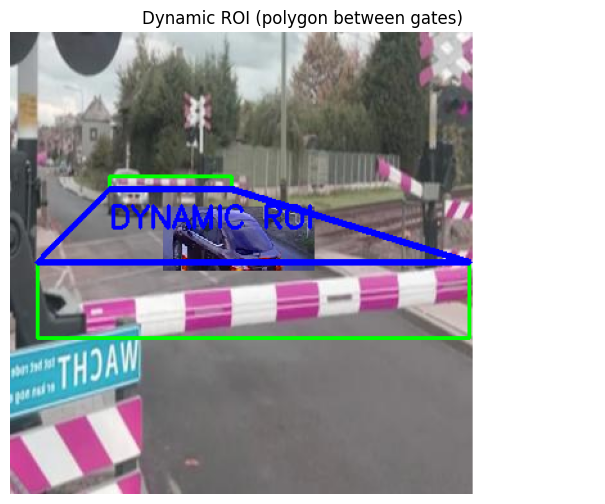

In [15]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load model
model_path = "/kaggle/input/yolo_detection/other/default/1/best.pt"
model = YOLO(model_path)

# Image path
image_path = "/kaggle/input/obstical/obstical.png"
results = model(image_path)

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect gate bounding boxes
gate_boxes = []
for box in results[0].boxes:
    class_id = int(box.cls[0])
    if model.names[class_id] == "gate":
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        gate_boxes.append((x1, y1, x2, y2))  # (left, top, right, bottom)

# Proceed only if exactly 2 gates are found
if len(gate_boxes) == 2:
    # Sort by y (top to bottom)
    gate_boxes = sorted(gate_boxes, key=lambda b: b[1])
    # Gate 1: top gate, Gate 2: bottom gate
    g1_x1, g1_y1, g1_x2, g1_y2 = gate_boxes[0]  # Gate 1 (top)
    g2_x1, g2_y1, g2_x2, g2_y2 = gate_boxes[1]  # Gate 2 (bottom)

    # Gate 1: bottom left and bottom right
    gate1_bl = (g1_x1, g1_y2)
    gate1_br = (g1_x2, g1_y2)
    # Gate 2: top left and top right
    gate2_tl = (g2_x1, g2_y1)
    gate2_tr = (g2_x2, g2_y1)

    # ROI polygon: gate1_bl, gate1_br, gate2_tr, gate2_tl
    roi_pts = np.array([
        gate1_bl,  # bottom left of gate 1
        gate1_br,  # bottom right of gate 1
        gate2_tr,  # top right of gate 2
        gate2_tl,  # top left of gate 2
    ], dtype=np.int32)

    # Draw gate bounding boxes
    for x1, y1, x2, y2 in gate_boxes:
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Draw the ROI polygon
    cv2.polylines(img_rgb, [roi_pts], isClosed=True, color=(0, 0, 255), thickness=3)
    cv2.putText(img_rgb, "DYNAMIC ROI", (gate1_bl[0], gate1_bl[1] + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    # Print ROI coordinates
    print("ROI Coordinates (polygon):")
    for i, (x, y) in enumerate(roi_pts):
        print(f"  Point {i+1}: ({x}, {y})")

else:
    print(f"❌ Detected {len(gate_boxes)} gates. Expected exactly 2.")

# Print all detected objects
print("\nDetected Objects:")
for box in results[0].boxes:
    class_id = int(box.cls[0])
    class_name = model.names[class_id]
    conf = float(box.conf[0])
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    print("--------------------")
    print(f"  Class: {class_name} (ID: {class_id})")
    print(f"  Confidence: {conf:.2f}")
    print(f"  Bounding Box (xyxy): [{x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f}]")

# Display result
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Dynamic ROI (polygon between gates)")
plt.show()

In [17]:
!pip install shapely

In [18]:
from shapely.geometry import Polygon, box

# Only run if ROI is defined (i.e., 2 gates found)
if len(gate_boxes) == 2:
    # Create ROI polygon using shapely
    roi_polygon = Polygon(roi_pts)

    print("\nObjects overlapping with ROI:")
    overlap_found = False
    for box_obj in results[0].boxes:
        class_id = int(box_obj.cls[0])
        class_name = model.names[class_id]
        if class_name == "gate":
            continue  # Skip gates

        x1, y1, x2, y2 = box_obj.xyxy[0].tolist()
        obj_box = box(x1, y1, x2, y2)  # Create shapely box

        if roi_polygon.intersects(obj_box):
            overlap_found = True
            print(f"  - {class_name} (ID: {class_id}) overlaps with ROI. BBox: [{x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f}]")

    if not overlap_found:
        print("  No objects overlap with ROI.")

else:
    print("ROI not defined, skipping overlap check.")


Objects overlapping with ROI:
  - sign_off (ID: 6) overlaps with ROI. BBox: [50.98, 119.24, 76.10, 163.12]



image 1/1 /kaggle/input/obstical/obstical.png: 512x640 2 cars, 2 crosss, 2 gates, 2 sign_offs, 8.6ms
Speed: 3.1ms preprocess, 8.6ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 640)
ROI Coordinates (polygon):
  Point 1: (77, 122)
  Point 2: (172, 122)
  Point 3: (357, 179)
  Point 4: (21, 179)

Objects overlapping with ROI:
  - car (ID: 1) overlaps with ROI. BBox: [126.48, 135.43, 212.64, 186.84]
  - car (ID: 1) overlaps with ROI. BBox: [74.35, 107.91, 108.50, 142.71]

Detected Objects:
--------------------
  Class: car (ID: 1)
  Confidence: 0.97
  Bounding Box (xyxy): [126.48, 135.43, 212.64, 186.84]
--------------------
  Class: cross (ID: 2)
  Confidence: 0.96
  Bounding Box (xyxy): [318.40, 0.41, 359.88, 44.34]
--------------------
  Class: car (ID: 1)
  Confidence: 0.92
  Bounding Box (xyxy): [74.35, 107.91, 108.50, 142.71]
--------------------
  Class: cross (ID: 2)
  Confidence: 0.90
  Bounding Box (xyxy): [135.40, 46.87, 156.99, 76.50]
--------------------
  Cla

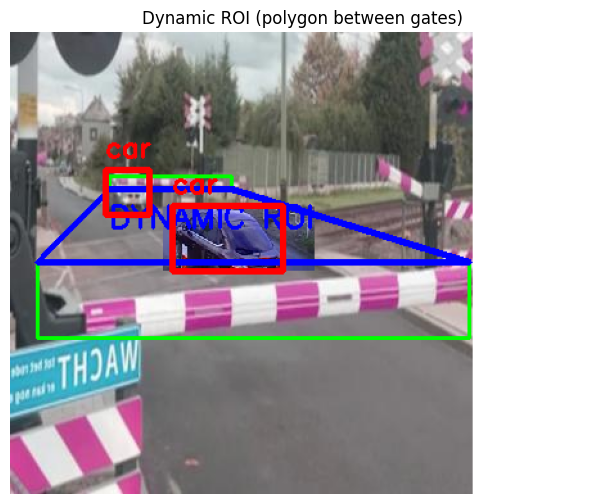

In [19]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box

# Load model
model_path = "/kaggle/input/yolo_detection/other/default/1/best.pt"
model = YOLO(model_path)

# Image path
image_path = "/kaggle/input/obstical/obstical.png"
results = model(image_path)

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect gate bounding boxes
gate_boxes = []
for box_obj in results[0].boxes:
    class_id = int(box_obj.cls[0])
    if model.names[class_id] == "gate":
        x1, y1, x2, y2 = map(int, box_obj.xyxy[0].tolist())
        gate_boxes.append((x1, y1, x2, y2))  # (left, top, right, bottom)

# Proceed only if exactly 2 gates are found
if len(gate_boxes) == 2:
    # Sort by y (top to bottom)
    gate_boxes = sorted(gate_boxes, key=lambda b: b[1])
    # Gate 1: top gate, Gate 2: bottom gate
    g1_x1, g1_y1, g1_x2, g1_y2 = gate_boxes[0]  # Gate 1 (top)
    g2_x1, g2_y1, g2_x2, g2_y2 = gate_boxes[1]  # Gate 2 (bottom)

    # Gate 1: bottom left and bottom right
    gate1_bl = (g1_x1, g1_y2)
    gate1_br = (g1_x2, g1_y2)
    # Gate 2: top left and top right
    gate2_tl = (g2_x1, g2_y1)
    gate2_tr = (g2_x2, g2_y1)

    # ROI polygon: gate1_bl, gate1_br, gate2_tr, gate2_tl
    roi_pts = np.array([
        gate1_bl,  # bottom left of gate 1
        gate1_br,  # bottom right of gate 1
        gate2_tr,  # top right of gate 2
        gate2_tl,  # top left of gate 2
    ], dtype=np.int32)

    # Draw gate bounding boxes
    for x1, y1, x2, y2 in gate_boxes:
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Draw the ROI polygon
    cv2.polylines(img_rgb, [roi_pts], isClosed=True, color=(0, 0, 255), thickness=3)
    cv2.putText(img_rgb, "DYNAMIC ROI", (gate1_bl[0], gate1_bl[1] + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    # Print ROI coordinates
    print("ROI Coordinates (polygon):")
    for i, (x, y) in enumerate(roi_pts):
        print(f"  Point {i+1}: ({x}, {y})")

    # Check for overlap with ROI
    roi_polygon = Polygon(roi_pts)
    print("\nObjects overlapping with ROI:")
    overlap_found = False
    for box_obj in results[0].boxes:
        class_id = int(box_obj.cls[0])
        class_name = model.names[class_id]
        if class_name == "gate":
            continue  # Skip gates

        x1, y1, x2, y2 = box_obj.xyxy[0].tolist()
        obj_box = box(x1, y1, x2, y2)

        if roi_polygon.intersects(obj_box):
            overlap_found = True
            print(f"  - {class_name} (ID: {class_id}) overlaps with ROI. BBox: [{x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f}]")
            # Draw bounding box for overlapping object
            cv2.rectangle(
                img_rgb,
                (int(x1), int(y1)),
                (int(x2), int(y2)),
                (255, 0, 0),  # Red color for overlap
                3
            )
            cv2.putText(
                img_rgb,
                f"{class_name}",
                (int(x1), int(y1) - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.7,
                (255, 0, 0),
                2
            )
    if not overlap_found:
        print("  No objects overlap with ROI.")

else:
    print(f"❌ Detected {len(gate_boxes)} gates. Expected exactly 2.")

# Print all detected objects
print("\nDetected Objects:")
for box_obj in results[0].boxes:
    class_id = int(box_obj.cls[0])
    class_name = model.names[class_id]
    conf = float(box_obj.conf[0])
    x1, y1, x2, y2 = box_obj.xyxy[0].tolist()
    print("--------------------")
    print(f"  Class: {class_name} (ID: {class_id})")
    print(f"  Confidence: {conf:.2f}")
    print(f"  Bounding Box (xyxy): [{x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f}]")

# Display result
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Dynamic ROI (polygon between gates)")
plt.show()

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# === Load the YOLOv8 model ===
model_path = "/kaggle/input/yolo_detection/other/default/1/best.pt"
model = YOLO(model_path)

# === Run inference on your input image ===
image_path = "/kaggle/input/obstical/obstical.png"
results = model(image_path)

# Load original image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# === Extract gate bounding boxes ===
gate_boxes = []
for box in results[0].boxes:
    class_id = int(box.cls[0])
    class_name = model.names[class_id]
    
    if class_name == "gate":
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        gate_boxes.append(((x1, y1), (x2, y2)))  # top-left and bottom-right

# === Continue only if exactly 2 gates are detected ===
if len(gate_boxes) == 2:
    # Sort by x position (left-to-right)
    gate_boxes = sorted(gate_boxes, key=lambda b: b[0][0])

    # Define the vertical ROI region between the gates
    (x1a, y1a), (x2a, y2a) = gate_boxes[0]  # Left gate
    (x1b, y1b), (x2b, y2b) = gate_boxes[1]  # Right gate

    # Compute ROI polygon: top-left, top-right, bottom-right, bottom-left
    roi_pts = np.array([
        [x2a, y1a],  # top-right of left gate
        [x1b, y1b],  # top-left of right gate
        [x1b, y2b],  # bottom-left of right gate
        [x2a, y2a]   # bottom-right of left gate
    ], dtype=np.int32)

    # Draw gate boxes
    for (pt1, pt2) in gate_boxes:
        cv2.rectangle(img_rgb, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), (0, 255, 0), 2)

    # Draw ROI polygon
    cv2.polylines(img_rgb, [roi_pts], isClosed=True, color=(255, 0, 0), thickness=3)
    cv2.putText(img_rgb, "DYNAMIC ROI", tuple(roi_pts[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Optionally: fill ROI
    # cv2.fillPoly(img_rgb, [roi_pts], color=(0, 0, 255, 50))

else:
    print(f"❌ Expected 2 gates, but found {len(gate_boxes)}. Cannot create ROI.")

# === Display the output ===
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("ROI Between Closed Gates")
plt.show()


# Fater RCNN Method

Working directory created/ensured: /kaggle/working/faster_rcnn_training_output
Using device: cuda
Loaded 332 images for train split from /kaggle/input/detection-dataset-split/detection_dataset_split/images/train
Loaded 84 images for val split from /kaggle/input/detection-dataset-split/detection_dataset_split/images/val

Starting Faster R-CNN training...
Epoch: 1/50, Batch: 0/83, Loss: 5.0991
Epoch: 1/50, Batch: 10/83, Loss: 1.6482
Epoch: 1/50, Batch: 20/83, Loss: 1.7436
Epoch: 1/50, Batch: 30/83, Loss: 1.5219
Epoch: 1/50, Batch: 40/83, Loss: 1.2665
Epoch: 1/50, Batch: 50/83, Loss: 1.3729
Epoch: 1/50, Batch: 60/83, Loss: 1.1036
Epoch: 1/50, Batch: 70/83, Loss: 1.0142
Epoch: 1/50, Batch: 80/83, Loss: 0.8704
Epoch 1 finished. Average Loss: 1.3963
Validation check for Epoch 1 completed.
Epoch: 2/50, Batch: 0/83, Loss: 1.1133
Epoch: 2/50, Batch: 10/83, Loss: 0.8379
Epoch: 2/50, Batch: 20/83, Loss: 0.6705
Epoch: 2/50, Batch: 30/83, Loss: 0.5988
Epoch: 2/50, Batch: 40/83, Loss: 0.5608
Epoch: 

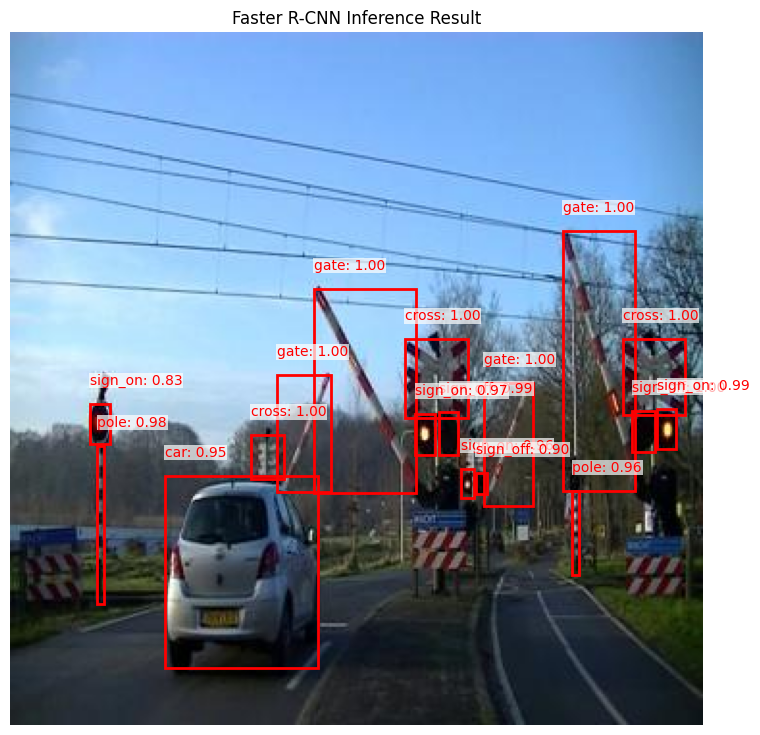

In [6]:
import torch
import torchvision
# Import FastRCNNPredictor for replacing the classification head
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_Weights
from torchvision.transforms import functional as F
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import yaml # Still useful for reading class names if needed, though not strictly for data loading in this setup

# --- Configuration ---
WORK_DIR = "/kaggle/working/faster_rcnn_training_output"
# Ensure the dataset_root matches your actual dataset location
dataset_root = "/kaggle/input/detection-dataset-split/detection_dataset_split"

NUM_CLASSES = 11 # Your 11 classes
CLASS_NAMES = ['__background__', 'bike', 'car', 'cross', 'gate', 'person', 'pole', 'sign_off', 'sign_on', 'train', 'truck', 'wait_plate']
# Note: __background__ is class 0, your actual classes start from 1.

EPOCHS = 50
BATCH_SIZE = 4 # Faster R-CNN typically uses smaller batch sizes due to memory
LEARNING_RATE = 0.005
MOMENTUM = 0.9
WEIGHT_DECAY = 0.0005
# IMG_SIZE is not directly used by default transforms, but kept for reference
IMG_SIZE = (640, 640) # Input image size for the model

# --- Setup Directories ---
os.makedirs(WORK_DIR, exist_ok=True)
print(f"Working directory created/ensured: {WORK_DIR}")

# --- Custom Dataset Class for YOLO format to Faster R-CNN ---
class TorchvisionDataset(Dataset):
    def __init__(self, root_dir, split, transforms=None):
        self.root_dir = root_dir
        self.split = split # 'train' or 'val'
        self.transforms = transforms
        self.image_dir = os.path.join(root_dir, 'images', split)
        self.label_dir = os.path.join(root_dir, 'labels', split)
        self.image_files = [f for f in os.listdir(self.image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
        print(f"Loaded {len(self.image_files)} images for {split} split from {self.image_dir}")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_dir, img_name)
        
        # Load image
        image = Image.open(img_path).convert("RGB")
        width, height = image.size

        # Load annotations (YOLO format: class_id center_x center_y width height)
        label_name = os.path.splitext(img_name)[0] + '.txt'
        label_path = os.path.join(self.label_dir, label_name)
        
        boxes = []
        labels = []

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f.readlines():
                    parts = list(map(float, line.strip().split(' ')))
                    
                    # YOLO format: class_id, center_x, center_y, box_width, box_height (all normalized)
                    class_id = int(parts[0])
                    x_center, y_center, box_width_norm, box_height_norm = parts[1:]

                    # Convert normalized YOLO format to absolute [x_min, y_min, x_max, y_max]
                    x_min = int((x_center - box_width_norm / 2) * width)
                    y_min = int((y_center - box_height_norm / 2) * height)
                    x_max = int((x_center + box_width_norm / 2) * width)
                    y_max = int((y_center + box_height_norm / 2) * height)

                    # Ensure coordinates are within image bounds
                    x_min = max(0, x_min)
                    y_min = max(0, y_min)
                    x_max = min(width, x_max)
                    y_max = min(height, y_max)

                    # Add to boxes list if valid (min coords < max coords)
                    if x_max > x_min and y_max > y_min:
                        boxes.append([x_min, y_min, x_max, y_max])
                        # Faster R-CNN expects class ID 0 for background, so shift your classes by 1
                        labels.append(class_id + 1)
        
        # Convert to PyTorch tensors
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        # Create target dictionary
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = torch.tensor([idx]) # Unique ID for the image
        target["area"] = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]) # Area for COCO evaluation
        target["iscrowd"] = torch.zeros((len(boxes),), dtype=torch.int64) # All objects are not crowd

        if self.transforms:
            image, target = self.transforms(image, target)

        return image, target

# --- Transforms (basic for now, can be expanded) ---
# Custom ToTensor transform that works with image and target
class ToTensor(object):
    def __call__(self, image, target):
        image = F.to_tensor(image)
        return image, target

def get_transform(train):
    transforms = []
    # Use our custom ToTensor transform
    transforms.append(ToTensor())
    if train:
        # Add data augmentation for training if desired
        # transforms.append(T.RandomHorizontalFlip(0.5))
        pass
    return Compose(transforms)

class Compose:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            # Each transform in the list is expected to take (image, target) and return (image, target)
            image, target = t(image, target)
        return image, target

# --- Collate Function for DataLoader ---
# This is crucial for object detection models as targets are dictionaries
def collate_fn(batch):
    return tuple(zip(*batch))

# --- Model Definition ---
def get_model_instance_segmentation(num_classes):
    # Load a model pre-trained on COCO
    # We use FasterRCNN_ResNet50_FPN_Weights.DEFAULT for recommended weights
    weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=weights)

    # Get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # Replace the pre-trained head with a new one that has num_classes outputs
    # Use FastRCNNPredictor for replacing the box_predictor
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

# --- Main Training and Evaluation Logic ---
if __name__ == "__main__":
    # Determine device
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    print(f"Using device: {device}")

    # Load the model
    model = get_model_instance_segmentation(len(CLASS_NAMES)) # Pass total classes including background
    model.to(device)

    # Construct datasets
    train_dataset = TorchvisionDataset(dataset_root, 'train', get_transform(train=True))
    val_dataset = TorchvisionDataset(dataset_root, 'val', get_transform(train=False))

    # Construct data loaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=os.cpu_count() // 2, # Use half of CPU cores for data loading
        collate_fn=collate_fn
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=os.cpu_count() // 2,
        collate_fn=collate_fn
    )

    # Define optimizer and learning rate scheduler
    params = [p for p in model.parameters() if p.requires_grad]
    optimizer = torch.optim.SGD(params, lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
    lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

    # --- Training Loop ---
    print("\nStarting Faster R-CNN training...")
    for epoch in range(EPOCHS): # Corrected typo from EPOCONDS to EPOCHS
        model.train() # Set model to training mode
        total_loss = 0
        for i, (images, targets) in enumerate(train_loader):
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            total_loss += losses.item()

            optimizer.zero_grad()
            losses.backward()
            optimizer.step()

            if i % 10 == 0: # Print every 10 batches
                print(f"Epoch: {epoch+1}/{EPOCHS}, Batch: {i}/{len(train_loader)}, Loss: {losses.item():.4f}")
        
        lr_scheduler.step() # Update learning rate

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1} finished. Average Loss: {avg_loss:.4f}")

        # --- Simple Validation (optional, can be expanded for full mAP) ---
        # For a full mAP evaluation, you'd typically use torchvision.models.detection.evaluate
        # with COCO API, which requires more setup for custom datasets.
        # This is a basic inference run on validation data.
        model.eval() # Set model to evaluation mode
        with torch.no_grad():
            val_loss = 0
            for i, (images, targets) in enumerate(val_loader):
                images = list(image.to(device) for image in images)
                targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
                
                # In eval mode, model returns detections directly, not losses
                # To get losses in eval, you'd need to pass targets, but it's not standard
                # For simplicity, we'll just check if it runs without error
                try:
                    # When targets are passed in eval mode, the model still computes losses internally,
                    # but it's typically used for evaluating performance metrics, not for backpropagation.
                    # We're just ensuring the forward pass works.
                    model(images, targets) 
                except Exception as e:
                    # Catch any unexpected errors during validation forward pass
                    print(f"Warning: Error during validation forward pass in epoch {epoch+1}, batch {i}: {e}")
                    pass 

            print(f"Validation check for Epoch {epoch+1} completed.")

    print("\nFaster R-CNN training completed.")

    # --- Save the trained model ---
    model_save_path = os.path.join(WORK_DIR, 'faster_rcnn_model.pth')
    torch.save(model.state_dict(), model_save_path)
    print(f"Trained model saved to: {model_save_path}")

    # --- Demonstrate Inference on a Sample Image ---
    print("\nDemonstrating inference on a sample validation image...")
    model.eval() # Ensure model is in evaluation mode
    
    # Get a sample image from the validation set
    if len(val_dataset) > 0:
        sample_image_tensor, sample_target = val_dataset[0]
        sample_image_pil = F.to_pil_image(sample_image_tensor) # Convert tensor back to PIL for display

        with torch.no_grad():
            prediction = model([sample_image_tensor.to(device)])[0]

        # Filter predictions based on score threshold
        score_threshold = 0.7 # Adjust as needed
        boxes = prediction['boxes'][prediction['scores'] > score_threshold].cpu().numpy()
        labels = prediction['labels'][prediction['scores'] > score_threshold].cpu().numpy()
        scores = prediction['scores'][prediction['scores'] > score_threshold].cpu().numpy()

        # Visualize results
        fig, ax = plt.subplots(1, figsize=(12, 9))
        ax.imshow(sample_image_pil)

        for i, box in enumerate(boxes):
            x_min, y_min, x_max, y_max = box
            label_id = labels[i]
            score = scores[i]
            
            # Get class name (handle potential out-of-bounds if model predicts unexpected IDs)
            class_name = CLASS_NAMES[label_id] if label_id < len(CLASS_NAMES) else f"Unknown({label_id})"

            rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                     linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(x_min, y_min - 10, f"{class_name}: {score:.2f}", color='red', fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=0.5))

        ax.set_title("Faster R-CNN Inference Result")
        plt.axis('off')
        plt.show()
    else:
        print("No validation images available for inference demonstration.")


# 

# Evaluation Matrix for Fater RCNN

In [3]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_Weights
from torchvision.transforms import functional as F
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Import COCO tools for mAP calculation
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# --- Configuration ---
# Path to your trained Faster R-CNN model's state_dict
MODEL_PATH = "/kaggle/input/faster-rcnn/other/default/1/faster_rcnn_model.pth"

# Root directory of your dataset (same as used for training)
DATASET_ROOT = "/kaggle/input/detection-dataset-split/detection_dataset_split"

# Define your classes (must match the order used during training, with __background__ as 0)
NUM_CLASSES = 11 # Your 11 custom classes
CLASS_NAMES = ['__background__', 'bike', 'car', 'cross', 'gate', 'person', 'pole', 'sign_off', 'sign_on', 'train', 'truck', 'wait_plate']
# Total classes for the model will be len(CLASS_NAMES) (11 + 1 background = 12)

# IOU thresholds for evaluation, as requested in your format
IOU_THRESHOLDS = [0.4, 0.5, 0.6, 0.7, 0.75]

# Confidence threshold for filtering predictions before calculating metrics
# A low threshold ensures all potential detections are considered for TP/FP/FN
CONF_THRESHOLD = 0.001 

# Batch size for evaluation (can be larger than training batch size)
EVAL_BATCH_SIZE = 4 

# --- Custom Dataset Class for YOLO format to Faster R-CNN ---
class TorchvisionDataset(Dataset):
    def __init__(self, root_dir, split, transforms=None):
        self.root_dir = root_dir
        self.split = split # 'train' or 'val'
        self.transforms = transforms
        self.image_dir = os.path.join(root_dir, 'images', split)
        self.label_dir = os.path.join(root_dir, 'labels', split)
        self.image_files = [f for f in os.listdir(self.image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
        print(f"Loaded {len(self.image_files)} images for {split} split from {self.image_dir}")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_dir, img_name)
        
        image = Image.open(img_path).convert("RGB")
        width, height = image.size

        label_name = os.path.splitext(img_name)[0] + '.txt'
        label_path = os.path.join(self.label_dir, label_name)
        
        boxes = []
        labels = []

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f.readlines():
                    parts = list(map(float, line.strip().split(' ')))
                    
                    class_id = int(parts[0])
                    x_center, y_center, box_width_norm, box_height_norm = parts[1:]

                    x_min = int((x_center - box_width_norm / 2) * width)
                    y_min = int((y_center - box_height_norm / 2) * height)
                    x_max = int((x_center + box_width_norm / 2) * width)
                    y_max = int((y_center + box_height_norm / 2) * height)

                    x_min = max(0, x_min)
                    y_min = max(0, y_min)
                    x_max = min(width, x_max)
                    y_max = min(height, y_max)

                    if x_max > x_min and y_max > y_min:
                        boxes.append([x_min, y_min, x_max, y_max])
                        labels.append(class_id + 1) # Shift class IDs by 1 for background class
        
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = torch.tensor([idx])
        target["area"] = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        target["iscrowd"] = torch.zeros((len(boxes),), dtype=torch.int64)

        if self.transforms:
            image, target = self.transforms(image, target)

        return image, target

# --- Transforms ---
class ToTensor(object):
    def __call__(self, image, target):
        image = F.to_tensor(image)
        return image, target

class Compose:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            image, target = t(image, target)
        return image, target

# --- Collate Function for DataLoader ---
def collate_fn(batch):
    return tuple(zip(*batch))

# --- Model Definition ---
def get_model_instance_segmentation(num_classes):
    # Load a model pre-trained on COCO
    weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=weights)

    # Get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # Replace the pre-trained head with a new one that has num_classes outputs
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

# --- Evaluation Helper Functions ---

def calculate_iou(boxA, boxB):
    # Determine the coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # Compute the area of intersection
    inter_area = max(0, xB - xA) * max(0, yB - yA)

    # Compute the area of both the prediction and ground-truth rectangles
    boxA_area = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxB_area = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    # Compute the intersection over union
    iou = inter_area / float(boxA_area + boxB_area - inter_area) if (boxA_area + boxB_area - inter_area) > 0 else 0.0
    return iou

def evaluate_model_and_get_metrics(model, dataloader, device, iou_threshold, class_names, conf_threshold=0.0):
    model.eval() # Set model to evaluation mode
    
    # Lists to store COCO-formatted ground truth and predictions
    coco_gt_annotations = []
    coco_pred_annotations = []
    
    # COCO categories (excluding background)
    coco_categories = [{"id": i, "name": name} for i, name in enumerate(class_names) if name != '__background__']
    
    # Map dataset image_id to actual image info (width, height) for COCO GT
    # This is important if image_ids are not sequential or don't start from 0
    coco_images_info = []
    image_id_counter = 0 # Use a consistent image_id for COCO
    
    # Store a mapping from original dataset index to new COCO image_id
    dataset_idx_to_coco_img_id = {}

    with torch.no_grad():
        for batch_idx, (images, targets) in enumerate(dataloader):
            images_gpu = list(img.to(device) for img in images)
            
            predictions = model(images_gpu)

            for i in range(len(images)): # Iterate through each image in the batch
                original_dataset_idx = targets[i]['image_id'].item()
                
                # Assign a unique COCO image_id
                coco_img_id = image_id_counter
                dataset_idx_to_coco_img_id[original_dataset_idx] = coco_img_id
                image_id_counter += 1

                # Add image info for COCO GT
                # images[i] is the tensor: C, H, W. So H=shape[1], W=shape[2]
                coco_images_info.append({
                    "id": coco_img_id,
                    "width": images[i].shape[2],
                    "height": images[i].shape[1],
                    "file_name": f"image_{original_dataset_idx}.jpg" # Placeholder filename
                })

                # Process Ground Truth for COCO format
                gt_boxes = targets[i]['boxes'].cpu().numpy()
                gt_labels = targets[i]['labels'].cpu().numpy()
                gt_areas = targets[i]['area'].cpu().numpy()
                gt_iscrowd = targets[i]['iscrowd'].cpu().numpy()

                for anno_idx in range(len(gt_boxes)):
                    gt_box = gt_boxes[anno_idx]
                    gt_label = gt_labels[anno_idx]
                    gt_area = gt_areas[anno_idx]
                    gt_is_crowd = gt_iscrowd[anno_idx]

                    if gt_label == 0: continue # Skip background GT

                    coco_gt_annotations.append({
                        "id": len(coco_gt_annotations) + 1, # Unique annotation ID
                        "image_id": coco_img_id,
                        "category_id": int(gt_label), # Already shifted by 1
                        "bbox": [float(gt_box[0]), float(gt_box[1]), float(gt_box[2]-gt_box[0]), float(gt_box[3]-gt_box[1])], # x,y,w,h
                        "area": float(gt_area),
                        "iscrowd": int(gt_is_crowd)
                    })

                # Process Predictions for COCO format
                pred_boxes = predictions[i]['boxes'].cpu().numpy()
                pred_labels = predictions[i]['labels'].cpu().numpy()
                pred_scores = predictions[i]['scores'].cpu().numpy()

                for p_box, p_label, p_score in zip(pred_boxes, pred_labels, pred_scores):
                    if p_score < conf_threshold: continue
                    if p_label == 0: continue # Skip background predictions

                    coco_pred_annotations.append({
                        "image_id": coco_img_id,
                        "category_id": int(p_label),
                        "bbox": [float(p_box[0]), float(p_box[1]), float(p_box[2]-p_box[0]), float(p_box[3]-p_box[1])], # x,y,w,h
                        "score": float(p_score)
                    })
    
    # Create COCO ground truth object
    coco_gt_data = {
        "images": coco_images_info,
        "annotations": coco_gt_annotations,
        "categories": coco_categories
    }
    coco_gt = COCO()
    coco_gt.dataset = coco_gt_data
    coco_gt.createIndex()

    # Create COCO detections object
    # If no predictions, coco_dt will be empty, which COCOeval handles
    if not coco_pred_annotations:
        coco_dt = coco_gt.loadRes([]) # Load empty results
    else:
        coco_dt = coco_gt.loadRes(coco_pred_annotations)

    # Initialize COCOeval
    coco_eval = COCOeval(coco_gt, coco_dt, 'bbox')
    
    # Set IoU thresholds to only the one specified for mAP calculation
    coco_eval.params.iouThrs = np.array([iou_threshold])
    
    # Perform evaluation
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize() # This will print the COCO summary to console

    # Extract mAP at the specified IOU threshold (stats[0] for single IoU)
    mAP_result = coco_eval.stats[0] 

    # --- Manual Precision, Recall, F1 calculation (to match previous output format) ---
    # This is separate from COCOeval's internal P/R/F1 which are usually averaged over confidence thresholds
    # and classes. This section calculates aggregate P/R/F1 at the *single* specified IOU threshold.
    total_tps = 0
    total_fps = 0
    total_fns = 0

    # Re-iterate through predictions and ground truths for manual P/R/F1
    # This is less efficient but ensures the P/R/F1 matches the previous format
    # and is calculated at the exact single IOU threshold.
    model.eval()
    with torch.no_grad():
        for images, targets in dataloader:
            images_gpu = list(img.to(device) for img in images)
            predictions = model(images_gpu)

            for i in range(len(images)):
                gt_boxes = targets[i]['boxes'].cpu().numpy()
                gt_labels = targets[i]['labels'].cpu().numpy()
                
                pred_boxes = predictions[i]['boxes'].cpu().numpy()
                pred_labels = predictions[i]['labels'].cpu().numpy()
                pred_scores = predictions[i]['scores'].cpu().numpy()

                high_conf_indices = pred_scores >= conf_threshold
                pred_boxes_filtered = pred_boxes[high_conf_indices]
                pred_labels_filtered = pred_labels[high_conf_indices]

                matched_gt_for_image = np.zeros(len(gt_boxes), dtype=bool)

                for p_idx in range(len(pred_boxes_filtered)):
                    p_box = pred_boxes_filtered[p_idx]
                    p_label = pred_labels_filtered[p_idx]

                    if p_label == 0: continue # Skip background predictions

                    best_iou = 0.0
                    best_gt_idx = -1

                    for gt_idx in range(len(gt_boxes)):
                        if gt_labels[gt_idx] == p_label and not matched_gt_for_image[gt_idx]:
                            iou = calculate_iou(p_box, gt_boxes[gt_idx])
                            if iou > best_iou:
                                best_iou = iou
                                best_gt_idx = gt_idx
                    
                    if best_iou >= iou_threshold:
                        total_tps += 1
                        matched_gt_for_image[best_gt_idx] = True
                    else:
                        total_fps += 1
                
                for gt_idx in range(len(gt_boxes)):
                    gt_label = gt_labels[gt_idx]
                    if gt_label != 0 and not matched_gt_for_image[gt_idx]:
                        total_fns += 1

    precision_agg = total_tps / (total_tps + total_fps) if (total_tps + total_fps) > 0 else 0.0
    recall_agg = total_tps / (total_tps + total_fns) if (total_tps + total_fns) > 0 else 0.0
    f1_score_agg = 2 * (precision_agg * recall_agg) / (precision_agg + recall_agg) if (precision_agg + recall_agg) > 0 else 0.0

    return mAP_result, precision_agg, recall_agg, f1_score_agg


# --- Main Evaluation Logic ---
if __name__ == "__main__":
    # Determine device
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    print(f"Using device: {device}")

    # Load the model architecture
    model = get_model_instance_segmentation(len(CLASS_NAMES))
    
    # Load the trained weights (state_dict)
    try:
        model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
        print(f"✅ Trained model state_dict loaded from: {MODEL_PATH}")
    except Exception as e:
        print(f"❌ Error loading model state_dict: {e}")
        print("Please ensure the model path is correct and the file contains a valid state_dict.")
        exit()

    model.to(device)
    model.eval() # Set model to evaluation mode

    # Construct validation dataset and data loader
    val_dataset = TorchvisionDataset(DATASET_ROOT, 'val', get_transform(train=False))
    val_loader = DataLoader(
        val_dataset,
        batch_size=EVAL_BATCH_SIZE,
        shuffle=False,
        num_workers=os.cpu_count() // 2,
        collate_fn=collate_fn
    )
    print(f"Loaded {len(val_dataset)} validation images.")

    # --- Collect metrics for each IOU threshold ---
    metrics_data = []
    print("\nStarting Faster R-CNN evaluation for specified IOU thresholds...")

    for iou_thresh in IOU_THRESHOLDS:
        print(f"\nEvaluating at IOU Threshold: {iou_thresh:.2f}")
        
        # Calculate metrics using the custom function
        mAP, precision, recall, f1_score = evaluate_model_and_get_metrics(
            model, val_loader, device, iou_thresh, CLASS_NAMES, CONF_THRESHOLD
        )
        
        metrics_data.append({
            "IOU Threshold": f"{iou_thresh:.1f}",
            "mAP": f"{mAP:.2%}",
            "Precision": f"{precision:.2%}",
            "Recall": f"{recall:.2%}",
            "F1 score": f"{f1_score:.2%}"
        })
        print(f"  P: {precision:.3f}, R: {recall:.3f}, F1: {f1_score:.3f}")

    print("\nFaster R-CNN evaluation completed for all specified IOU thresholds.")

    # --- Display Metrics in a DataFrame ---
    df_metrics = pd.DataFrame(metrics_data)

    print("\n📊 Evaluation Metrics Summary:")
    # Explicitly display the DataFrame in Jupyter Notebook
    from IPython.display import display
    display(df_metrics)


Using device: cuda
✅ Trained model state_dict loaded from: /kaggle/input/faster-rcnn/other/default/1/faster_rcnn_model.pth
Loaded 84 images for val split from /kaggle/input/detection-dataset-split/detection_dataset_split/images/val
Loaded 84 validation images.

Starting Faster R-CNN evaluation for specified IOU thresholds...

Evaluating at IOU Threshold: 0.40
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.14s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.40:0.40 | area=   all | maxDets=100 ] = 0.756
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.40:0.40 | area= small | maxDets=100 ] = 0.771
 Average Precision  (AP) @[ IoU=0.40:0.40 | area=medium | maxDets=100 ]

IOU Threshold     mAP Precision  Recall F1 score
0           0.4  75.56%    42.68%  97.20%   59.32%
1           0.5  74.81%    42.37%  96.50%   58.89%
2           0.6  72.74%    41.36%  94.19%   57.48%
3           0.7  67.26%    39.21%  89.29%   54.49%
4           0.8  59.57%    37.05%  84.38%   51.50%

# Evaluation Matrix for YOLOv8

In [7]:
import os
from ultralytics import YOLO
import pandas as pd
import numpy as np
from IPython.display import display # For explicit display in Jupyter
import yaml # Import yaml for data.yaml generation

# --- Configuration ---
# Path to your trained YOLOv8 model
MODEL_PATH = "/kaggle/input/yolo_detection/other/default/1/best.pt"

# Root directory of your dataset (same as used for training)
# This is crucial for data.yaml generation
DATASET_ROOT = "/kaggle/input/detection-dataset-split/detection_dataset_split"

# Define the IOU thresholds for which you want to see the metrics
# These are the thresholds from your example image
IOU_THRESHOLDS = [0.4, 0.5, 0.6, 0.7, 0.75]

# Confidence threshold for filtering predictions before calculating metrics
# A low threshold ensures all potential detections are considered for metric calculation
CONF_THRESHOLD = 0.001 

# Image size for evaluation (should match what your model was trained with, or a compatible size)
# 640 is a common default for YOLOv8.
IMG_SIZE = 640

# Define your classes (must match the order used during training)
# This is used for data.yaml generation and understanding results
NUM_CLASSES = 11 
CLASS_NAMES = ['bike', 'car', 'cross', 'gate', 'person', 'pole', 'sign_off', 'sign_on', 'train', 'truck', 'wait_plate']

# Define the working directory where outputs (like data.yaml) will be saved
WORK_DIR = "/kaggle/working/yolo_training_output"
os.makedirs(WORK_DIR, exist_ok=True)
print(f"Working directory created/ensured: {WORK_DIR}")


# --- Generate data.yaml for YOLOv8 ---
# This dictionary defines the structure and paths for your dataset for YOLO
data_yaml_content = {
    'path': DATASET_ROOT,  # The root directory of your dataset
    'train': 'images/train', # Path to training images relative to dataset_root
    'val': 'images/val',     # Path to validation images relative to dataset_root
    'nc': NUM_CLASSES,       # Number of classes
    'names': CLASS_NAMES     # Class names
}

# Define the path where the data.yaml file will be saved in the WORK_DIR
yaml_path = os.path.join(WORK_DIR, 'data.yaml')

# Save the data.yaml dictionary to a YAML file
try:
    with open(yaml_path, 'w') as f:
        yaml.dump(data_yaml_content, f, sort_keys=False)
    print("\n✅ Generated data.yaml for YOLOv8 evaluation:")
    print(yaml.dump(data_yaml_content, sort_keys=False))
    print(f"data.yaml saved to: {yaml_path}")
except Exception as e:
    print(f"❌ Error generating data.yaml: {e}")
    raise # Re-raise to stop execution if data.yaml cannot be created


# --- Load Model ---
print(f"\nLoading YOLOv8 model from: {MODEL_PATH}")
try:
    model = YOLO(MODEL_PATH)
    print("✅ Model loaded successfully.")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("Please ensure the model path is correct and the file exists.")
    raise # Re-raise the exception to stop execution in notebook if model fails to load

# --- Prepare to collect metrics ---
metrics_data = []

# --- Run Validation for each IOU threshold ---
print("\nStarting YOLOv8 model evaluation for specified IOU thresholds...")
for iou_thresh in IOU_THRESHOLDS:
    print(f"\nEvaluating at IOU Threshold: {iou_thresh:.2f}")
    
    # Run validation. The 'iou' argument specifies the single IOU threshold
    # for which to calculate metrics.
    # results.box.map50 will contain the mAP at this specific iou_thresh.
    # conf=CONF_THRESHOLD ensures low-confidence predictions are still considered for metrics.
    # imgsz=IMG_SIZE sets the image size for evaluation.
    # verbose=False suppresses detailed per-batch output during validation.
    # The 'data' argument ensures the validator uses the newly created data.yaml
    results = model.val(data=yaml_path, iou=iou_thresh, conf=CONF_THRESHOLD, imgsz=IMG_SIZE, verbose=False)

    # Extract metrics from the results object
    # results.box.map50 gives mAP at the specified iou_thresh
    mAP_at_iou = results.box.map50
    precision = results.box.mp # Mean Precision
    recall = results.box.mr    # Mean Recall

    # Calculate F1 score
    if (precision + recall) > 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = 0.0 # Avoid division by zero if precision and recall are both zero

    metrics_data.append({
        "IOU Threshold": f"{iou_thresh:.1f}",
        "mAP": f"{mAP_at_iou:.2%}", # Format as percentage
        "Precision": f"{precision:.2%}",
        "Recall": f"{recall:.2%}",
        "F1 score": f"{f1_score:.2%}"
    })
    print(f"  mAP: {mAP_at_iou:.3f}, P: {precision:.3f}, R: {recall:.3f}, F1: {f1_score:.3f}")

print("\nYOLOv8 model evaluation completed for all specified IOU thresholds.")

# --- Display Metrics in a DataFrame ---
df_metrics = pd.DataFrame(metrics_data)

print("\n📊 Evaluation Metrics Summary:")
# Explicitly display the DataFrame in Jupyter Notebook for a formatted table
display(df_metrics)


Working directory created/ensured: /kaggle/working/yolo_training_output

✅ Generated data.yaml for YOLOv8 evaluation:
path: /kaggle/input/detection-dataset-split/detection_dataset_split
train: images/train
val: images/val
nc: 11
names:
- bike
- car
- cross
- gate
- person
- pole
- sign_off
- sign_on
- train
- truck
- wait_plate

data.yaml saved to: /kaggle/working/yolo_training_output/data.yaml

Loading YOLOv8 model from: /kaggle/input/yolo_detection/other/default/1/best.pt
✅ Model loaded successfully.

Starting YOLOv8 model evaluation for specified IOU thresholds...

Evaluating at IOU Threshold: 0.40
Ultralytics 8.3.169 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 18.2MB/s]

val: Fast image access ✅ (ping: 1.1±0.1 ms, read: 40.2±17.0 MB/s, size: 23.6 KB)



val: Scanning /kaggle/input/detection-dataset-split/detection_dataset_split/labels/val... 84 images, 0 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<00:00, 581.40it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/detection-dataset-split/detection_dataset_split/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         84        999      0.899      0.906      0.915      0.734
Speed: 3.4ms preprocess, 11.7ms inference, 0.0ms loss, 10.0ms postprocess per image
Results saved to runs/detect/val2
  mAP: 0.915, P: 0.899, R: 0.906, F1: 0.903

Evaluating at IOU Threshold: 0.50
Ultralytics 8.3.169 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 45.6±25.7 MB/s, size: 25.8 KB)


val: Scanning /kaggle/input/detection-dataset-split/detection_dataset_split/labels/val... 84 images, 0 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<00:00, 987.01it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/detection-dataset-split/detection_dataset_split/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         84        999      0.894      0.899      0.916      0.736
Speed: 2.6ms preprocess, 6.0ms inference, 0.0ms loss, 11.9ms postprocess per image
Results saved to runs/detect/val3
  mAP: 0.916, P: 0.894, R: 0.899, F1: 0.897

Evaluating at IOU Threshold: 0.60
Ultralytics 8.3.169 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 55.7±11.5 MB/s, size: 27.3 KB)


val: Scanning /kaggle/input/detection-dataset-split/detection_dataset_split/labels/val... 84 images, 0 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<00:00, 1092.26it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/detection-dataset-split/detection_dataset_split/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         84        999      0.893      0.897      0.916      0.736
Speed: 2.3ms preprocess, 6.3ms inference, 0.0ms loss, 14.1ms postprocess per image
Results saved to runs/detect/val4
  mAP: 0.916, P: 0.893, R: 0.897, F1: 0.895

Evaluating at IOU Threshold: 0.70
Ultralytics 8.3.169 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 35.9±11.1 MB/s, size: 20.0 KB)


val: Scanning /kaggle/input/detection-dataset-split/detection_dataset_split/labels/val... 84 images, 0 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<00:00, 1084.86it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/detection-dataset-split/detection_dataset_split/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         84        999      0.928      0.865      0.914      0.737
Speed: 3.4ms preprocess, 9.7ms inference, 0.0ms loss, 10.4ms postprocess per image
Results saved to runs/detect/val5
  mAP: 0.914, P: 0.928, R: 0.865, F1: 0.895

Evaluating at IOU Threshold: 0.75
Ultralytics 8.3.169 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 47.3±15.1 MB/s, size: 22.7 KB)


val: Scanning /kaggle/input/detection-dataset-split/detection_dataset_split/labels/val... 84 images, 0 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<00:00, 1118.41it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/detection-dataset-split/detection_dataset_split/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         84        999      0.916      0.856      0.912      0.737
Speed: 2.2ms preprocess, 4.8ms inference, 0.0ms loss, 12.0ms postprocess per image
Results saved to runs/detect/val6
  mAP: 0.912, P: 0.916, R: 0.856, F1: 0.885

YOLOv8 model evaluation completed for all specified IOU thresholds.

📊 Evaluation Metrics Summary:


IOU Threshold     mAP Precision  Recall F1 score
0           0.4  91.46%    89.94%  90.62%   90.28%
1           0.5  91.55%    89.42%  89.94%   89.68%
2           0.6  91.56%    89.25%  89.69%   89.47%
3           0.7  91.41%    92.76%  86.50%   89.52%
4           0.8  91.17%    91.59%  85.56%   88.47%